# Annie Yan
**Steam Game Recommender System**

annie.yq.yan@gmail.com

<h1 align='center'>Steam Game Recommender</h1>
<h2 align='center'>Data Pre-processing</h2>

# Table of Contents

* [Introduction](#Introduction)
* [Methodology](#Methodology)
    * [Data Sourcing](#DataSource)
    * [Programming Language Info](#Programming)
* [Importing and Processing Data](#Import)
    * [Base Steam Game Data](#Base_Steam_Game_Data)
    * [Secondary Steam Game Data](#Secondary_Steam_Game_Data)
        * [Steam Game Data Supplement 1: Game Data](#Supplement1)
        * [Steam Game Data Supplement 2: Tags Only](#Supplement2)
        * [Steam Game Descriptions](#Supplement3)
        * [Steam Tag Information](#Supplement4)
        * [Steam Game Average Play Time Information](#Supplement5)
    * [Null Value Imputation](#ImputeNull)
* [Final Steam Game Data](#Steam_Games)
* [Alternate Steam Game Data](#Alt_Steam_Games)
* [Recommendations by Users](#User_Recommendations)
* [User Stats](#User_Stats)

Steam is a market-dominant digital video game distribution service competing against other, similar platforms such as Epic Game Store, Amazon Prime Gaming and GOG. 

At its peak, there have been almost 30 million users on at one time and it consistently averages 10s of millions of online users each day ([Steam Data Charts](https://store.steampowered.com/charts/ "Steam Data Charts")). And there are currently around 80 thousand games available on the platform ([SteamDB Release Info](https://steamdb.info/stats/releases/)). 

This creates a need to be able to find games within each player's tastes from all the potential options. 

<a name='Introduction'></a>
## Introduction

**Purpose:** To create a recommender system that will be able to output a game recommendation based on previous games played.

To achieve this goal, existing Steam game data will be compiled into a usable form, then analyzed, modeled and a final recommendation system will be created from the results. More basic models will likely be created in the process of this. 

This notebook is 1 of 4 notebooks to be used for this project. This specific notebook will focus on data pre-processing and the creation of a cleaned data set. 

Please refer to:
- Part 2 for exploratory data analysis and visualization
- Part 3 for modeling
- Part 4 for model evaluation. 

<a name='Methodology'></a>
## Methodology

<a name='DataSource'></a>
### Data Sourcing
Multiple data sets from [Kaggle](https://www.kaggle.com/) will be utilized to obtain a greater breadth of information. This information will have been derived from the Steam Store API, SteamSpy API and [Average Game Time](howlongtobeat.com).

The links to the original data sets being utilized are as follows: 
- [Game Recommendations on Steam by Anton Kozyriev](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)
- [Steam Games Dataset by Martin Bustos](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset)
- [Steam games dataset by Alexander Shein](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)
- [🎮 SteamGames (71k games) by mexwell](https://www.kaggle.com/datasets/mexwell/steamgames)
- [Steam Games and DLCs Dataset by MikeKzan](https://www.kaggle.com/datasets/mikekzan/steam-games-dlcs?select=steam.csv)
- [Steam games data from Steam API and other sources](https://www.kaggle.com/datasets/vicentearce/)


<a name='Programming'></a>
### Programming Language
Python with additionally imported libaries will be the language of choice for this project.

The basic libraries that may be used have been imported below. 

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns

import scipy as spy
from scipy import stats

import statsmodels.api as sm

In [2]:
# Shows all columns when previewing information
pd.set_option('display.max_columns', None)

In [3]:
# Printing version of library being used. 
print('NumPy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Seaborn Version: ', sns.__version__)
print('Matplotlib Version: ', mpl.__version__)
print('Scipy Version: ', spy.__version__)
print('Statsmodels.api Version: ', sm.__version__)

NumPy Version:  1.23.5
Pandas Version:  1.5.3
Seaborn Version:  0.12.2
Matplotlib Version:  3.7.0
Scipy Version:  1.10.0
Statsmodels.api Version:  0.13.5


Version control, for purpose of troubleshooting in the event of version incompatibility.

These are the versions of the libraries that were used when running this notebook:
- NumPy Version: 1.23.5
- Pandas Version: 1.5.3
- Seaborn Version: 0.12.2
- Matplotlib Version: 3.7.0
- Scipy Version:  1.10.0
- Statsmodels.api Version:  0.13.5

<a name='Import'></a>
## Importing and Processing Data

<a name='Base_Steam_Game_Data'></a>
### Base Steam Game Data

This set is from [SteamGames (71k games)](https://www.kaggle.com/datasets/mexwell/steamgames) / [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset), which used the following scraper from [ Steam-Games-Scraper](https://github.com/FronkonGames/Steam-Games-Scraper) to take information from Steam's API and SteamSpy's API.

In [4]:
steam_games = pd.read_csv('raw_data/steam_games.csv', index_col='AppID')

In [5]:
steam_games.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
steam_games.sample(5)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
626170,Apocalypse Night,"Oct 30, 2017",0 - 20000,0,0,0.99,0,Apocalypse Night is an addictive 2D action pla...,"['English', 'Portuguese - Brazil', 'Spanish - ...","['Portuguese - Brazil', 'Spanish - Spain']",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://thalesmerschitz.wixsite.com/embryo/apo...,https://thalesmerschitz.wixsite.com/embryo/sob...,embryogames@outlook.com,True,False,False,0,NaN,0,24,6,NaN,27,0,NaN,0,0,0,0,Embryo,Embryo,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Adventure,Indie,Survival,Platformer,Tow...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1239470,Raid,"Jun 24, 2020",0 - 20000,0,0,5.99,0,"'My future had to be the brightest. At least, ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://ikuku.vision/,NaN,krasavitza.ikuku@gmail.com,True,False,False,0,NaN,0,0,0,NaN,18,0,This game may not be appropriate for some audi...,0,0,0,0,Ikuku,Ikuku,"Single-player,Steam Achievements","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1835260,Brewmastery: Tavern Simulator,"Apr 5, 2023",0 - 20000,2,0,8.99,0,Build your own medieval brewery with a full se...,"['English', 'Russian']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,angelina.m@rave.dev,True,False,False,0,NaN,0,1,6,NaN,0,0,NaN,0,0,0,0,Rave Games,Rave Games,Single-player,"Adventure,Indie,Simulation,Early Access","Early Access,Immersive Sim,Sandbox,Open World,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1082450,Gold Hunter,"May 13, 2022",0 - 20000,28,0,34.99,0,Have you always dreamed of going on a gold hun...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://gh-game.com/,https://www.goldhuntermp.com,info@goldhuntermp.com,True,False,False,0,NaN,0,156,138,NaN,10,228,NaN,774,1048,774,1048,eXtreme Studios,eXtreme Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Indie,Simulation,Early Access","Simulation,Indie,Early Access,Multiplayer,Sing...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
1612980,VR Game Station,"Jun 14, 2021",50000 - 100000,0,0,10.99,0,VR Game Station allows you to play multiple ga...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://crackedbonestudios.com/,batuhan.gner@gmail.com,True,False,False,0,NaN,0,1,1,NaN,0,0,NaN,0,0,0,0,Batuhan Güner,Batuhan Güner,Single-player,"Adventure,Casual,Indie,Simulation,Sports,Early...","Casual,Simulation,Arcade,Platformer,FPS,3D,Fir...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [7]:
steam_games.shape

(74689, 38)

In [8]:
steam_games.sort_index(inplace=True)
steam_games.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,"Nov 1, 2000",10000000 - 20000000,13230,0,9.99,0,Play the world's number 1 online action game. ...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://steamcommunity.com/app/10,NaN,True,True,True,88,https://www.metacritic.com/game/pc/counter-str...,0,198387,5135,NaN,0,122770,Includes intense violence and blood.,10524,1733,228,733,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
20,Team Fortress Classic,"Apr 1, 1999",5000000 - 10000000,110,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,True,True,True,0,NaN,0,5677,923,NaN,0,4722,Includes intense violence and blood.,143,0,23,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
30,Day of Defeat,"May 1, 2003",5000000 - 10000000,106,0,4.99,0,Enlist in an intense brand of Axis vs. Allied ...,"['English', 'French', 'German', 'Italian', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,NaN,NaN,True,True,True,79,https://www.metacritic.com/game/pc/day-of-defe...,0,5179,566,NaN,0,3246,NaN,1397,0,27,0,Valve,Valve,"Multi-player,Valve Anti-Cheat enabled",Action,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
40,Deathmatch Classic,"Jun 1, 2001",5000000 - 10000000,2,0,4.99,0,Enjoy fast-paced multiplayer gaming with Death...,"['English', 'French', 'German', 'Italian', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,True,True,True,0,NaN,0,1929,428,NaN,0,1570,NaN,945,0,10,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
50,Half-Life: Opposing Force,"Nov 1, 1999",5000000 - 10000000,120,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://help.steampowered.com,NaN,True,True,True,0,NaN,0,14333,718,NaN,0,12374,NaN,214,0,66,0,Gearbox Software,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


There is data for 74,689 games with around 39 different features of these games. 

In [9]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74689 entries, 10 to 2468080
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        74687 non-null  object 
 1   Release date                74689 non-null  object 
 2   Estimated owners            74689 non-null  object 
 3   Peak CCU                    74689 non-null  int64  
 4   Required age                74689 non-null  int64  
 5   Price                       74689 non-null  float64
 6   DLC count                   74689 non-null  int64  
 7   About the game              71973 non-null  object 
 8   Supported languages         74689 non-null  object 
 9   Full audio languages        74689 non-null  object 
 10  Reviews                     9285 non-null   object 
 11  Header image                74689 non-null  object 
 12  Website                     35985 non-null  object 
 13  Support url                 

<h3 align='center'>Data Dictionary</h3>

|Column|Description|
|------|-----------|
|AppID|The unique product identifier on Steam (This will become the index column)|
|Name|Name of the game| 
|Release date|Date that the game was released on Steam|
|Estimated owners|Bins for approximately how many people have purchased the game|
|Peak CCU|Peak number of concurrent users, yesterday*|
|Required age|Minimum age necessary to buy/play the game|
|Price|Cost of the game in USD, 0 if free|
|DLC count|Number of DLCs associated with the game|
|About the game|Description about the game|
|Supported languages|Which languages does the game support|
|Full audio languages|Which languages does the game have audio support for|
|Reviews|Text review of game|
|Header image|Url to header image on Steam store page|
|Website|Url to game|
|Support url|Url to game support|
|Support email|Game support email|
|Windows|Is the game playable on Windows systems|
|Mac|Is the game playable on Mac systems|
|Linux|Is the game playable on Linux systems|
|Metacritic score|Metacritic score, 0 if it has none|
|Metacritic url|Url to Metacritic review
|User score|User score, 0 if there is none|
|Positive|Number of positive votes|
|Negative|Number of negative votes|
|Score rank|Rank of the game based on user reviews|
|Achievements|Number of achievements that can be obtained, 0 if there are none|
|Recommendations|Number of user recommendations, 0 if there are none|
|Notes|Extra information about the content of the game|
|Average playtime forever|Average playtime since March 2009, in minutes|
|Average playtime two weeks|Average playtime in the last two weeks, in minutes|
|Median playtime forever|Median playtime since March 2009|
|Median playtime two weeks|Median playtime in the last two weeks, in minutes|
|Developers|What is/are the developer(s) of the game|
|Publishers|Who is the publisher of the game| 
|Categories|Search categories within Steam|
|Genres|What type/genre the game falls under|
|Tags|Tags associated with the game|
|Screenshots|Game screenshot urls|
|Movies|Game movie urls|

There are a number of columns in this dataframe that are not necessary for the purposes of this specific analysis.

The following columns will be dropped:
- `Peak CCU`
    - This appears to be a peak concurrent users appears to be a single instance in time, with an unidentified timeframe. 
- `Reviews` 
    - A more complete set of details about each game will be obtained from another dataset, if possible.
- `Header image` 
    - Url that will not be needed for this analysis.
- `Website`
    - Url that will not be needed for this analysis.
- `Support url`
    - Url that will not be needed for this analysis.
- `Support email`
    - Email that will not affect the choice to recommend, nor be needed for this analysis
- `Metacritic url` 
    - Url that will not be needed for this analysis.
- `User score` 
    - Insufficient user score data, despite no null values. An attempt will be made to examine the distribution of this column and acquire comparable information elsewhere.
- `Score rank`
    - Does not contain sufficient information with only 42 of 71716 entries being filled. Similar information can be derived from other columns and through other data sets. 
- `Notes`
     - Extra information that can likely be derived from game description information. 
- `Screenshots`
    - Url that will not be needed for this analysis.
- `Movies`
    - Url that will not be needed for this analysis.

In [10]:
# Sampling what `Notes` looks like
steam_games[steam_games['Notes'].isna()==False]['Notes'].sample(5)

AppID
976920     Adult themes throughout Very strong language t...
1473870                    Cartoon violence, blood and gore.
1295500    Warhammer 40,000: Battlesector contains graphi...
1855470          Content includes blood, death, and killing.
1597430    Game contains nudity and sexual content. Also ...
Name: Notes, dtype: object

`Notes` appears to contain information that can be encompassed by game descriptions and tags, so as mentioned will be dropped.

In [11]:
# Checking what `User score` looks like
steam_games['User score'].value_counts()

0      74647
100        5
80         2
51         2
95         2
46         2
84         2
77         2
68         2
69         1
87         1
53         1
61         1
76         1
92         1
94         1
57         1
71         1
78         1
73         1
65         1
55         1
63         1
59         1
98         1
66         1
97         1
60         1
83         1
88         1
82         1
96         1
Name: User score, dtype: int64

<Axes: xlabel='User score', ylabel='Count'>

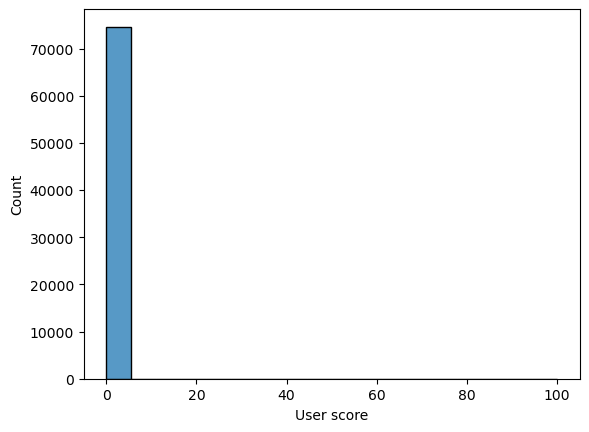

In [12]:
# Plotting user score to take 
sns.histplot(steam_games['User score'])

It appears that the `User score` is primarily made up of 0 values, which does not provide additional information that would contribute to a meaningful recommendation, so this column will also be dropped. 

In [13]:
steam_games.drop(columns=['Peak CCU',
                          'Reviews', 
                          'Header image', 
                          'Website',
                          'Support url',
                          'Support email',
                          'Metacritic url',
                          'User score',
                          'Score rank',
                          'Notes',
                          'Screenshots',
                          'Movies'], 
                inplace=True)

In [14]:
# Remaining columns
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74689 entries, 10 to 2468080
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        74687 non-null  object 
 1   Release date                74689 non-null  object 
 2   Estimated owners            74689 non-null  object 
 3   Required age                74689 non-null  int64  
 4   Price                       74689 non-null  float64
 5   DLC count                   74689 non-null  int64  
 6   About the game              71973 non-null  object 
 7   Supported languages         74689 non-null  object 
 8   Full audio languages        74689 non-null  object 
 9   Windows                     74689 non-null  bool   
 10  Mac                         74689 non-null  bool   
 11  Linux                       74689 non-null  bool   
 12  Metacritic score            74689 non-null  int64  
 13  Positive                    

The remaining columns will be checked for any null values or duplicated values with the goal of preserving as many entries as possible. 

In [15]:
steam_games.isna().sum()

Name                              2
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                 2716
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     2738
Publishers                     2974
Categories                     3707
Genres                         2716
Tags                          15903
dtype: int64

Of the remaining columns, there are still a number with missing values that can ideally be supplemented from another data set. 

In [16]:
steam_games[steam_games['Name'].isna()==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
396420,NaN,"Nov 1, 2016",0 - 0,0,0.00,0,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村...,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1116910,NaN,"Sep 25, 2019",0 - 0,0,6.99,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Steam Cloud","Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN


There are 2 `Name`s missing from this data, which can easily be derived from their `AppID`. 

From [SteamDB](https://steamdb.info/app/396420/), it can be found that the `Name` of the game with `AppID` 396420 is *The Spookening*,  and the game with `AppID` 1116910 is *I am the dirt-for art*. 

These can be added into the dataframe. 

In [17]:
steam_games.loc[396420, 'Name'] = 'The Spookening'
steam_games.loc[1116910, 'Name'] = 'I am the dirt-for art'

In [18]:
# Checking the nan value has been replaced.
display(steam_games['Name'][396420])
display(steam_games['Name'][1116910])

'The Spookening'

'I am the dirt-for art'

In [19]:
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                 2716
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     2738
Publishers                     2974
Categories                     3707
Genres                         2716
Tags                          15903
dtype: int64

The simple null values from `Name`s has been addressed, so next will be to see if there are any duplicates and if that may assist in the elimination of the other larger null value categories. 

Checking for duplicated game information shows that there appears to be 4 entries that are duplicates. 

In [20]:
steam_games.duplicated().sum()

4

In [21]:
steam_games[steam_games.duplicated()==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
31160,Wallace & Gromit’s Grand Adventures,"Mar 23, 2009",0 - 20000,0,14.99,0,Enter the colorful world of West Wallaby Stree...,"['English (full audio)', 'French', 'German', '...",['English'],True,False,False,0,0,0,0,0,0,0,0,0,Telltale,Telltale,Single-player,Adventure,NaN
37980,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,19,3,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3"
37990,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,19,3,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3"
38020,Mahjong Quest Collection,"Aug 24, 2009",0 - 20000,0,9.99,0,Includes the first three installments of Mahjo...,['English'],[],True,False,False,0,20,2,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle"


In [22]:
steam_games[steam_games['Name']=='Jewel Quest Pack']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
37960,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,34,4,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Match 3,Puzzle"
37970,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,19,3,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3"
37980,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,19,3,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3"
37990,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],True,False,False,0,19,3,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3"


It can be seen that the 'Jewel Quest Pack' has different `AppID`s, which indicates that these are separate games as identified by Steam. 

Further looking into these games show that: 
|AppID|SteamDB Game Name|
|------|----------------|
|37960|Jewel Quest|
|37970|Jewel Quest 2|
|37980|Jewel Quest 3|
|37990|Jewel Quest Mysteries|

Each is a different game, and that these games have been grouped into a pack. These games are not available for individual purchase, so it is appropriate for the extra entries to be removed to prevent this game from having extra instances within the final recommender. 

In [23]:
steam_games[steam_games['Name']=='Mahjong Quest Collection']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
38000,Mahjong Quest Collection,"Aug 24, 2009",0 - 20000,0,9.99,0,Includes the first three installments of Mahjo...,['English'],[],True,False,False,0,34,3,0,0,2248,0,2248,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle"
38010,Mahjong Quest Collection,"Aug 24, 2009",0 - 20000,0,9.99,0,Includes the first three installments of Mahjo...,['English'],[],True,False,False,0,20,2,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle"
38020,Mahjong Quest Collection,"Aug 24, 2009",0 - 20000,0,9.99,0,Includes the first three installments of Mahjo...,['English'],[],True,False,False,0,20,2,0,0,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle"


|AppID|SteamDB Game Name|
|------|----------------|
|38000|Mahjong Quest|
|38010|Mahjong Quest 2|
|38020|Mahjong Quest 3|

The same case is seen for the Mahjong Quest games, so the same resolution will be applied here. 

In [24]:
steam_games[steam_games['Name']=='Wallace & Gromit’s Grand Adventures']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
31100,Wallace & Gromit’s Grand Adventures,"Mar 23, 2009",0 - 20000,0,14.99,0,Enter the colorful world of West Wallaby Stree...,"['English (full audio)', 'French', 'German', '...",['English'],True,False,False,0,127,20,0,0,285,0,517,0,Telltale,Telltale,Single-player,Adventure,"Adventure,Casual,Interactive Fiction,Character..."
31109,Wallace & Gromit’s Grand Adventures,"Mar 23, 2009",0 - 20000,0,14.99,0,Enter the colorful world of West Wallaby Stree...,"['English (full audio)', 'French', 'German', '...",['English'],True,False,False,0,0,0,0,0,0,0,0,0,Telltale,Telltale,Single-player,Adventure,NaN
31160,Wallace & Gromit’s Grand Adventures,"Mar 23, 2009",0 - 20000,0,14.99,0,Enter the colorful world of West Wallaby Stree...,"['English (full audio)', 'French', 'German', '...",['English'],True,False,False,0,0,0,0,0,0,0,0,0,Telltale,Telltale,Single-player,Adventure,NaN


|AppID|SteamDB Game Name|
|------|----------------|
|31100|Wallace & Gromit Ep 1: Fright of the Bumblebees|
|31109|Wallace & Gromit's Grand Adventures
|31160|Wallace & Gromit Demo|

This set of games is also only available as a single package, so the same solution will be applied as the previous 2 duplicated games. 

In [25]:
# Dropping duplciated rows.
steam_games.drop_duplicates(inplace=True)

In [26]:
# Checking for duplicates
steam_games.duplicated().sum()

0

In [27]:
# checking result
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74685 entries, 10 to 2468080
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        74685 non-null  object 
 1   Release date                74685 non-null  object 
 2   Estimated owners            74685 non-null  object 
 3   Required age                74685 non-null  int64  
 4   Price                       74685 non-null  float64
 5   DLC count                   74685 non-null  int64  
 6   About the game              71969 non-null  object 
 7   Supported languages         74685 non-null  object 
 8   Full audio languages        74685 non-null  object 
 9   Windows                     74685 non-null  bool   
 10  Mac                         74685 non-null  bool   
 11  Linux                       74685 non-null  bool   
 12  Metacritic score            74685 non-null  int64  
 13  Positive                    

Not much has changed with respect to the remaining null values, so further examination of the null values will be carried out. 

In [28]:
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                 2716
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     2738
Publishers                     2974
Categories                     3707
Genres                         2716
Tags                          15902
dtype: int64

The missing values for `About the game` will be addressed later as other data sets will be needed to assist in imputing values. 

It appears that there are a similar (though not exact) number of null values between `Developers`, `Publishers`, `Categories` and `Genres`, so these will be examined in conjunction with each other to see if there are any common patterns for these entries. 

By looking at entries where all 4 features are null, it is possible to see if these values can be dropped. 

In [29]:
# Setting up conditionals
null_developers = steam_games['Developers'].isna()==True
null_publishers = steam_games['Publishers'].isna()==True
null_categories = steam_games['Categories'].isna()==True
null_genres = steam_games['Genres'].isna()==True

In [30]:
# Shape of data where all 4 columns are null
steam_games[null_developers & null_publishers & null_categories & null_genres].shape

(2615, 26)

There are 2,615 entries where all 4 features are null.

In [31]:
steam_games[null_developers & null_publishers & null_categories & null_genres].sample(20).sort_values('Release date', ascending=False)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
2138220,TinyLand Playtest,"Sep 3, 2022",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2007630,Sliiide Playtest,"Sep 25, 2022",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1665400,ToneStone Playtest,"Oct 25, 2021",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1771950,The Apollo Project Playtest,"Nov 8, 2021",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1636120,Gloria Victis Playtest,"Nov 5, 2021",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1790390,Scuffed Party Playtest,"Nov 23, 2021",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1471190,NARAKA: BLADEPOINT - Test Server Playtest,"Nov 17, 2020",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2192870,Outshine Playtest,"Nov 16, 2022",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2432890,Mutantity Playtest,"May 17, 2023",0 - 0,0,0.0,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [32]:
# Looking at 'Estimated owners' characteristic of these entries to see if there is anything notable.
steam_games[null_developers & null_publishers & null_categories & null_genres]['Estimated owners'].describe()

count      2615
unique        1
top       0 - 0
freq       2615
Name: Estimated owners, dtype: object

From looking at a sample of the games that have simultaneous null values in the `Developers`, `Publishers`, `Categories` and `Genres` columns, it can be seen that these entries are not full games and that there are no users that own these games. 

The first 20 games appear to be playtests only, and having also sampled multiple times, other entries comprised of dedicated server build and other miscellaneous types. 

Thus, these rows can be safely dropped as it would not make sense to recommend what are essentially unreleased ('non-game') games. 

In [33]:
# Dropping rows with null in all 4 columns
steam_games.dropna(axis=0,
                   subset=['Publishers', 'Developers', 'Categories', 'Genres'],
                   how='all',
                   inplace=True)

In [34]:
# New shape of the data
steam_games.shape

(72070, 26)

In [35]:
# Checking remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                  105
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                      123
Publishers                      359
Categories                     1092
Genres                          101
Tags                          13287
dtype: int64

The result is fewer null values, though there are still a number that need to be resolved. 

In [36]:
steam_games[steam_games['Developers'].isna()==True].sort_values('Release date', ascending=False)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
617740,ASTA : NEW PURE Server,"Sep 6, 2017",0 - 0,0,0.00,0,ASTA Online official Store! New server 'PURE' ...,['English'],['English'],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Adventure,Free to Play,Massively Multip...",NaN
242550,Rayman® Legends,"Sep 3, 2013",0 - 0,0,29.99,0,"Michel Ancel, the celebrated creator of Rayman...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,89,0,0,0,5320,0,0,0,0,NaN,Ubisoft,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Adventure",NaN
253940,Septerra Core,"Sep 27, 2013",0 - 0,0,4.99,2,"At the very heart of Septerra lies the Core, a...","['English', 'German']","['English', 'German']",True,True,True,72,0,0,0,454,0,0,0,0,NaN,Topware Interactive,"Single-player,Steam Trading Cards,Steam Cloud",RPG,NaN
253920,Gorky 17,"Sep 27, 2013",0 - 0,17,4.99,2,November 2008. NATO intelligence services repo...,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'German', 'Spanish - Spain', 'Poli...",True,True,True,0,0,0,0,768,0,0,0,0,NaN,Topware Interactive ACE,"Single-player,Steam Trading Cards","RPG,Strategy",NaN
254100,World War II: Panzer Claws,"Sep 27, 2013",0 - 0,0,1.24,0,WORLD WAR II: PANZER CLAWS [aka Frontline Atta...,"['English', 'French', 'Italian', 'German', 'Po...","['English', 'German', 'Russian']",True,True,True,61,0,0,0,109,0,0,0,0,NaN,Topware Interactive,"Single-player,Multi-player,PvP,Online PvP,Cros...",Strategy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025740,The Woods: VR Escape the Room,"Apr 4, 2019",0 - 0,0,4.99,0,The Woods: VR Escape the Room is a roomscale-b...,['English'],['English'],True,False,False,0,0,0,0,0,0,0,0,0,NaN,NaN,Single-player,"Adventure,Indie,Strategy",NaN
811180,Farm Quest,"Apr 3, 2018",0 - 0,0,8.99,0,"In this match-3 game, it’s up to you to help a...","['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,familyplay,NaN,Casual,NaN
871810,Blackout,"Apr 23, 2019",0 - 0,0,5.99,0,"Blackout, is a single-player game with the goa...","['English', 'French', 'Italian', 'German', 'Ru...","['English', 'Spanish - Spain']",True,False,False,0,0,0,6,0,0,0,0,0,NaN,NaN,"Single-player,Steam Achievements,Full controll...",Indie,NaN


From sampling some of the entries with null `Developers`, it can be seen that some of the games are 'Playtest' entries, meaning that these are not fully released, completed games.

The recommender should not be recommending incomplete games, so these will be dropped.

In [37]:
# Checking how many games are 'Playtest' games
steam_games[steam_games['Name'].str.contains('Playtest')==True].shape

(25, 26)

In [38]:
# Dropping rows with `Playtest' games
steam_games.drop((steam_games[steam_games['Name'].str.contains('Playtest')==True].index),
                 axis=0,
                 inplace=True)

In [39]:
# Checking new shape
steam_games.shape

(72045, 26)

In [40]:
# Check remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   83
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                      104
Publishers                      338
Categories                     1091
Genres                           82
Tags                          13262
dtype: int64

Next, looking at entries where both `Developers` and `Publishers` are null, then cross-referencing a sample of games from the Steam application and [SteamDB](https://steamdb.info), it was noted that these entries have no known developer or publisher.

These values will be replaced with 'Unknown', and they make up a small percentage of the overall data. 

In [41]:
# Fining how many are null for `Developers` and `Publishers`
steam_games[null_developers & null_publishers].shape

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\3626845857.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[null_developers & null_publishers].shape


(46, 26)

In [42]:
# Looking at the type/characteristic of entries
steam_games[null_developers & null_publishers]

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\1084833157.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[null_developers & null_publishers]


,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
90500,Guardians of Graxia,"Nov 1, 2010",0 - 0,0,0.00,0,Guardians of Graxia takes on the form of a car...,['English'],[],True,False,False,0,0,0,14,142,0,0,0,0,NaN,NaN,"Single-player,Steam Achievements",Strategy,NaN
237370,PlayClaw 5 - Game Recording and Streaming,"Sep 10, 2013",0 - 0,0,39.99,3,The amazing PlayClaw video capture tool gives ...,"['English', 'Russian', 'French', 'Hungarian', ...",[],True,False,False,0,0,0,10,351,0,0,0,0,NaN,NaN,Steam Achievements,"Audio Production,Software Training,Utilities,V...",NaN
247350,Artemis Spaceship Bridge Simulator,"Sep 16, 2013",0 - 0,0,6.99,0,Artemis is designed for anyone who watched Sta...,['English'],['English'],True,False,False,0,0,0,0,291,0,0,0,0,NaN,NaN,"Multi-player,Co-op,Shared/Split Screen,Remote ...","Action,Indie,Simulation",NaN
248730,A Walk in the Dark,"Nov 7, 2013",0 - 0,0,6.99,0,"In this action platformer you play as a cat, B...",['English'],[],True,False,False,67,0,0,27,310,0,0,0,0,NaN,NaN,"Single-player,Steam Achievements,Full controll...","Action,Indie",NaN
249950,Forge Quest,"May 29, 2015",0 - 0,0,9.99,0,Forge Quest is a dungeon crawling rpg set in a...,['English'],[],True,True,True,0,0,0,49,435,0,0,0,0,NaN,NaN,"Single-player,Multi-player,Co-op,Cross-Platfor...","Action,Adventure,Indie,RPG",NaN
253310,Fester Mudd: Curse of the Gold - Episode 1,"Nov 4, 2013",0 - 0,0,9.99,0,"Set in Wild West, FESTER MUDD: CURSE OF THE GO...","['English', 'German']",[],True,True,True,76,0,0,15,0,0,0,0,0,NaN,NaN,"Single-player,Steam Achievements,Captions avai...",Adventure,NaN
259700,Dead Sky,"Nov 22, 2013",0 - 0,0,1.99,0,Dead Sky takes place admist the chaos of a mys...,['English'],['English'],True,True,True,0,0,0,44,150,0,0,0,0,NaN,NaN,"Single-player,Multi-player,Co-op,Cross-Platfor...","Action,Indie",NaN
259780,Nimble Quest,"Dec 6, 2013",0 - 0,0,4.99,0,Nimble Quest! Lead a conga line of heroes to g...,['English'],[],True,True,True,0,0,0,0,638,0,0,0,0,NaN,NaN,"Single-player,Full controller support,Steam Tr...","Action,Casual,Indie",NaN
305840,Shallow Space,"Oct 21, 2015",0 - 0,0,14.99,0,Construct your fleet ship-by-ship by foraging ...,['English'],['English'],True,True,True,0,0,0,0,173,0,0,0,0,NaN,NaN,"Single-player,Steam Trading Cards","RPG,Simulation,Strategy,Early Access",NaN


In [43]:
# Setting these null values to 'Unknown'
NaN_mask = null_developers & null_publishers
steam_games.loc[NaN_mask, 'Publishers'] = 'Unknown'
steam_games.loc[NaN_mask, 'Developers'] = 'Unknown'

In [44]:
# Checking remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   83
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                       58
Publishers                      292
Categories                     1091
Genres                           82
Tags                          13262
dtype: int64

For the remaining null `Developers` values, there is no consistent developer associated with any one `Publishers`. These will be fixed under a 'Various' label, since they make up a very small percentage of the overall data. 

In [45]:
steam_games[steam_games['Developers'].isna()==True].sort_values('Release date', ascending=False)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
242550,Rayman® Legends,"Sep 3, 2013",0 - 0,0,29.99,0,"Michel Ancel, the celebrated creator of Rayman...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,89,0,0,0,5320,0,0,0,0,NaN,Ubisoft,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Adventure",NaN
253920,Gorky 17,"Sep 27, 2013",0 - 0,17,4.99,2,November 2008. NATO intelligence services repo...,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'German', 'Spanish - Spain', 'Poli...",True,True,True,0,0,0,0,768,0,0,0,0,NaN,Topware Interactive ACE,"Single-player,Steam Trading Cards","RPG,Strategy",NaN
227020,Rise of Venice,"Sep 27, 2013",0 - 0,0,19.99,1,Venice was at the peak of its power during the...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",True,False,False,66,0,0,56,295,0,0,0,0,NaN,Kalypso Media Digital,"Single-player,Multi-player,Steam Achievements,...","Simulation,Strategy",NaN
254100,World War II: Panzer Claws,"Sep 27, 2013",0 - 0,0,1.24,0,WORLD WAR II: PANZER CLAWS [aka Frontline Atta...,"['English', 'French', 'Italian', 'German', 'Po...","['English', 'German', 'Russian']",True,True,True,61,0,0,0,109,0,0,0,0,NaN,Topware Interactive,"Single-player,Multi-player,PvP,Online PvP,Cros...",Strategy,NaN
253940,Septerra Core,"Sep 27, 2013",0 - 0,0,4.99,2,"At the very heart of Septerra lies the Core, a...","['English', 'German']","['English', 'German']",True,True,True,72,0,0,0,454,0,0,0,0,NaN,Topware Interactive,"Single-player,Steam Trading Cards,Steam Cloud",RPG,NaN
242960,Blood Omen 2: Legacy of Kain,"Sep 24, 2013",0 - 0,17,6.99,0,Cast down from power by a mysterious warlord c...,['English'],['English'],True,False,False,0,0,0,0,785,0,0,0,0,NaN,Square Enix,Single-player,Action,NaN
33730,18 Wheels of Steel: Extreme Trucker,"Sep 23, 2009",0 - 0,0,9.99,0,You ‘da Boss! Move it better and faster while ...,['English'],[],True,False,False,0,0,0,0,114,0,0,0,0,NaN,Cosmi Valusoft,Single-player,Simulation,NaN
247120,Portal 2 Sixense Perceptual Pack,"Sep 20, 2013",0 - 0,0,0.00,0,Portal 2 Sixense Perceptual Pack is a free sta...,['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,NaN,Sixense,Single-player,"Action,Adventure",NaN
248490,1953 - KGB Unleashed,"Sep 20, 2013",0 - 0,0,0.59,0,"Developed by Phantomery Interactive, 1953 – KG...","['English', 'French', 'German', 'Polish', 'Rus...","['English', 'French', 'German', 'Polish', 'Rus...",True,False,False,0,0,0,0,173,0,0,0,0,NaN,United Independent Entertainment,"Single-player,Steam Cloud","Adventure,Casual,Indie",NaN


In [46]:
# Assigning remaining null developers as 'Various'
steam_games.loc[(steam_games['Developers'].isna()==True), 'Developers'] = 'Various'

In [47]:
# Checking remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   83
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                      292
Categories                     1091
Genres                           82
Tags                          13262
dtype: int64

`Publishers` null values will be replaced with the same value that is present in `Developers` as it appears likely that no specific large-scale publisher assisted in publishing the game and it was likely released by a small development team. 

In [48]:
steam_games[steam_games['Publishers'].isna()==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
2540,RIP - Trilogy™,"Jun 1, 2007",100000 - 200000,0,4.99,0,With the completion of the third title in the ...,['English'],[],True,False,False,0,215,149,0,239,0,0,0,0,Elephant Games,NaN,"Single-player,Multi-player,Co-op","Casual,Indie","Indie,Casual,Arcade,Shooter,Action,2D,Shoot 'E..."
2545,RIP - Trilogy™,"Jun 1, 2007",100000 - 200000,0,4.99,0,With the completion of the third title in the ...,['English'],[],True,False,False,0,204,136,0,239,6,0,6,0,Elephant Games,NaN,"Single-player,Multi-player,Co-op","Casual,Indie","Indie,Casual,Arcade,Shooter,Action,2D,Top-Down..."
2550,RIP - Trilogy™,"Jun 1, 2007",100000 - 200000,0,4.99,0,With the completion of the third title in the ...,['English'],[],True,False,False,0,204,136,0,239,18,0,18,0,Elephant Games,NaN,"Single-player,Multi-player,Co-op","Casual,Indie","Indie,Casual,Arcade,Shooter,Action,2D,Top-Down..."
2570,Vigil: Blood Bitterness™,"Jun 29, 2007",50000 - 100000,0,0.00,0,Vigil: Blood Bitterness plunges you into the d...,['English'],[],True,False,False,61,29,115,0,109,0,0,0,0,Freegamer,NaN,Single-player,"Indie,RPG","Indie,RPG,Puzzle,Singleplayer,Adventure"
2720,ThreadSpace: Hyperbol,"Jul 12, 2007",0 - 20000,0,4.99,0,ThreadSpace: Hyperbol is an action-strategy ga...,['English'],[],True,False,False,0,35,11,0,0,0,0,0,0,Iocaine Studios,NaN,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...","Action,Indie,Strategy","Multiplayer,Action,Strategy,Real-Time,3D,Team-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146680,Coffee For Robots,"Sep 29, 2022",0 - 0,0,0.00,0,Make coffee for robots! Get sued! Run a small ...,['English'],['English'],True,False,False,0,0,0,0,0,0,0,0,0,Alec Roebuck,NaN,Single-player,"Casual,Indie,Simulation",NaN
2166190,Juan Sin Miedo,"Jan 8, 2023",0 - 20000,0,4.99,0,Terror strikes on the night of Day of the Dead...,"['English', 'Spanish - Latin America']",[],True,False,True,0,6,0,1,0,0,0,0,0,Scott Ian Ceja Lampkins,NaN,"Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Indie","Action,2D Platformer,Pixel Graphics,Arcade,Adv..."
2323690,Jigsaw Puzzles: Fantasy Landscapes,"Mar 7, 2023",0 - 0,0,0.99,0,Enjoy 30 puzzles of increasing difficulty feat...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,True,True,0,0,0,6,0,0,0,0,0,tornadre,NaN,"Single-player,Steam Achievements","Casual,Indie",NaN


In [49]:
# Filling null values with `Developers` data
steam_games['Publishers'].fillna(steam_games['Developers'], inplace=True)

In [50]:
# Checking remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   83
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                        0
Categories                     1091
Genres                           82
Tags                          13262
dtype: int64

For the null `Genres`, after sampling and checking some games on Steam and [SteamDB](https://steamdb.info), it appears these have yet to be associated with any specific genre on Steam. They also make up a small fraction of all game entries.

Thus, these will be labeled as 'Unlabeled' to represent a lack of known `Genre` label. 

In [51]:
steam_games['Genres'].fillna('Unlabeled', inplace=True)

In [52]:
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   83
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                        0
Categories                     1091
Genres                            0
Tags                          13262
dtype: int64

`Categories` still has a significant number of null values, so these observations will need to be examined further. 

In [53]:
steam_games[steam_games['Categories'].isna()==True].sample(10)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
746390,"PlayClaw :: Overlays, Game Recording & Streaming","Nov 20, 2017",0 - 20000,0,29.99,0,PlayClaw is game overlay application that can ...,"['English', 'Hungarian', 'Russian', 'Simplifie...",[],True,False,False,0,64,31,0,0,0,0,0,0,Eduard Kozadaev,Eduard Kozadaev,NaN,"Audio Production,Software Training,Utilities,V...","Utilities,Video Production,Audio Production,We..."
479010,Kodon,"Jun 3, 2016",0 - 20000,0,59.99,0,Kodon is a VR/Desktop sculpting software under...,['English'],[],True,False,False,0,163,64,0,218,0,0,0,0,TenkLabs,TenkLabs,NaN,"Simulation,Animation & Modeling,Design & Illus...","Simulation,Animation & Modeling,Design & Illus..."
527350,CGWallpapers,"Nov 30, 2016",0 - 20000,0,4.99,1,CGWallpapers offers exclusive wallpapers of co...,['English'],[],True,False,False,0,25,17,0,0,0,0,0,0,Flamy Frog Interactive,Flamy Frog Interactive,NaN,"Design & Illustration,Photo Editing","Design & Illustration,Photo Editing"
942770,Fractal To Desktop,"Oct 11, 2018",0 - 20000,0,4.99,0,"Note: Despite performance improvements, this p...",['English'],['English'],True,False,False,0,1,5,0,0,0,0,0,0,Shirom Makkad,Shirom Makkad,NaN,Utilities,Utilities
1248360,WalkinVR,"Jun 29, 2020",20000 - 50000,0,0.00,2,Important: When using the WalkinVR for the fir...,['English'],[],True,False,False,0,20,0,0,0,0,0,0,0,2MW,2MW,NaN,Utilities,"Utilities,VR,Controller"
2306930,RPG Maker - PiXel ScaLer,"Feb 15, 2023",0 - 0,0,0.00,0,Convert your map and character assets into RPG...,"['English', 'Simplified Chinese', 'Japanese']",[],True,False,False,0,0,0,0,0,0,0,0,0,"カル太,Gotcha Gotcha Games",Gotcha Gotcha Games,NaN,Photo Editing,NaN
766300,Mazetools Soniface Lab,"Mar 28, 2018",0 - 20000,0,29.99,0,SONIFACE LAB VERSION While in the Lite version...,['English'],[],True,True,False,0,5,0,0,0,0,0,0,0,Stephan Kloss,Ectoplastic UG,NaN,"Animation & Modeling,Audio Production,Design &...","Audio Production,Design & Illustration,Animati..."
1447430,小黑盒加速器,"May 24, 2021",0 - 0,0,0.00,0,小黑盒加速器有多个免费加速项供玩家体验： 包括所有游戏平台登录、新上线游戏限免加速、全部国服...,['Simplified Chinese'],[],True,False,False,0,0,0,0,0,0,0,0,0,Qing Feng Beijing Technology,Qing Feng Beijing Technology,NaN,"Software Training,Web Publishing,Game Development",NaN
269550,Zoom Player 13 : Steam Edition,"Apr 4, 2014",0 - 20000,0,0.00,6,"Zoom Player is a Powerful, Flexible and Highly...","['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,60,24,0,0,0,0,0,0,Inmatrix LTD,Inmatrix LTD,NaN,"Audio Production,Utilities,Video Production","Utilities,Audio Production,Video Production"


It appears that a number of observations that are missing category data are for non-game software (e.g. software training applications, illustration/modeling applications, video productions, etc). Since these are not games AND the number of remaining null values in `Categories` only makes up about 1.5% of the original 74,689 entries, these observations will be dropped. 

They do not fit the purpose of recommending Steam games as they are not games, and while there is a possibility of dropping some games that may be within this list, the amount of games lost would be negligible--being at most be only 1.5% of all options.

In [54]:
steam_games.dropna(axis=0, subset='Categories', inplace=True)

In [55]:
steam_games['Categories'].isna().sum()

0

In [56]:
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   81
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                        0
Categories                        0
Genres                            0
Tags                          13056
dtype: int64

In [57]:
# Checking remaining rows within data
steam_games.shape

(70954, 26)

A side check to see if there are any other non-game entries within this data set. 

Checking for keywords:
- DLC (which require base game to play)
- Editors
- Software

While this will not capture all DLC and extra material that is likely to contaminate the dataset, it will reduce the number of these entries. 

In [58]:
# Checking for DLC
steam_games[steam_games['Name'].str.contains('DLC')==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
42147,Hamilton's Great Adventure - Retro Fever DLC,"Oct 3, 2011",20000 - 50000,0,0.99,0,This map pack contains new levels that bring b...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,1,0,0,0,0,0,0,0,Fatshark,Fatshark,"Single-player,Multi-player,Shared/Split Screen...","Adventure,Casual,Indie","Adventure,Indie,Casual"
230050,DLC Quest,"Mar 18, 2013",200000 - 500000,0,2.99,0,What happens when DLC practices go too far? An...,['English'],['English'],True,True,False,0,5497,728,22,4992,143,0,123,0,Going Loud Studios,Going Loud Studios,"Single-player,Steam Achievements,Steam Trading...",Indie,"Platformer,Indie,Satire,Comedy,Short,Parody,Pi..."
274130,Rambo The Video Game + Baker Team DLC,"Feb 21, 2014",0 - 20000,16,0.00,0,RAMBO ® THE VIDEO GAME is a rail-shooter that ...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Spain']",True,False,False,0,320,233,34,408,38,0,38,0,Teyon,Reef Entertainment,"Single-player,Multi-player,Shared/Split Screen...",Action,"On-Rails Shooter,Quick-Time Events,Action,Arca..."
325670,CRYENGINE - Wwise Project DLC,"Oct 7, 2014",0 - 20000,0,0.00,0,The EaaS Wwise Project DLC gives you access to...,['English'],['English'],True,False,False,0,1,0,0,0,0,0,0,0,Crytek,Crytek,"Stats,Includes level editor",Unlabeled,NaN


In [59]:
# Dropping DLC only content
steam_games.drop([325670], inplace=True)

In [60]:
# Utitlies = non-game content
steam_games[steam_games['Genres'].str.contains('Utilities')==True].sample(10)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
582220,Virtual Idea Area,"Apr 14, 2017",0 - 20000,0,10.99,0,Ever ran out of space while writing on a white...,['English'],[],True,False,False,0,3,2,0,0,0,0,0,0,Racaedym Software,Racaedym Software,Includes level editor,"Design & Illustration,Utilities","Utilities,Design & Illustration,VR"
606010,Weelco VR,"Mar 23, 2017",0 - 20000,0,0.00,0,Weelco is a big gallery of free high quality (...,"['English', 'French', 'German', 'Spanish - Spa...",[],True,False,False,0,3,4,0,0,0,0,0,0,weelco_vr,weelco_vr,Full controller support,"Animation & Modeling,Utilities,Video Production","Utilities,Video Production,Animation & Modelin..."
524660,RutonyChat,"Sep 19, 2016",100000 - 200000,0,14.99,2,RutonyChat is a program for receiving messages...,"['English', 'Traditional Chinese', 'Russian']",[],True,False,False,0,537,140,16,552,27393,143,35048,143,Rutony Studio,Rutony Studio,"Steam Achievements,Steam Workshop,Steam Cloud","Animation & Modeling,Design & Illustration,Uti...","Utilities,Video Production,Design & Illustrati..."
1967460,Wicked Engine,"Sep 1, 2022",0 - 0,0,0.00,0,"Wicked Engine is a small, fast, experimental 3...",['English'],[],True,False,True,0,0,0,0,0,0,0,0,0,Turánszki János,Turánszki János,"Single-player,Partial Controller Support","Free to Play,Animation & Modeling,Design & Ill...",NaN
1772160,Nonlinear System Tools,"Dec 3, 2021",0 - 20000,0,19.99,0,NST: Nonlinear System Tools NST is a tool for ...,"['English', 'Russian', 'Ukrainian']",[],True,False,False,0,2,0,0,0,0,0,0,0,Martin Petkovski,Return Zero,Steam Workshop,"Utilities,Game Development,Early Access","Utilities,Early Access,Game Development,Story ..."
760710,Astrology and Horoscope Premium,"Dec 13, 2017",0 - 20000,0,8.99,0,2022 Astrology and Horoscopes Premium is the m...,"['English', 'Greek', 'French', 'German', 'Japa...",[],True,True,True,0,6,6,11,0,0,0,0,0,Crazysoft Limited,Crazysoft Limited,Steam Achievements,Utilities,Utilities
932480,GraviSound,"Sep 28, 2018",0 - 20000,0,1.29,0,Unusual continuation of the Button Music serie...,"['English', 'Russian']",[],True,False,False,0,20,8,0,0,0,0,0,0,URUS GAMES,URUS GAMES,Single-player,"Casual,Indie,Simulation,Audio Production,Educa...","Audio Production,Utilities,Indie,Casual,Simula..."
998330,My Desktop Alive,"Dec 26, 2018",0 - 20000,0,2.99,1,We spend an incredibly large amount of time si...,['English'],['English'],True,False,False,0,17,9,0,0,0,0,0,0,Tunnel Vision Studio,Tunnel Vision Studio,Single-player,"Casual,Simulation,Animation & Modeling,Design ...","Casual,Simulation,Utilities,Design & Illustrat..."
1621860,NekoDice,"Jun 24, 2021",0 - 0,0,0.00,2,A software for vtubers (Live2D). Built-in link...,"['English', 'Simplified Chinese', 'Turkish']",[],True,False,False,0,0,0,7,0,0,0,0,0,Anigen Media Group,ShengMa,"Single-player,Steam Achievements","Free to Play,Animation & Modeling,Utilities",NaN


In [61]:
# Checking how many are classified under 'Utilities'
steam_games[steam_games['Genres'].str.contains('Utilities')==True].shape

(254, 26)

Dropping anything that is classified as 'Utilities' under `Genres` as it can be seen that the majority of such observations are for applications, and are not games. 

In [62]:
# Dropping rows with 'Utilities'
steam_games.drop((steam_games[steam_games['Genres'].str.contains('Utilities')==True].index), axis=0, inplace=True)

In [63]:
# Checking resulting dataframe shape
steam_games.shape

(70699, 26)

In [64]:
# Checking for 'software'
steam_games[steam_games['Genres'].str.contains('Software')==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
269570,Gamer To Game Developer Series 1: More Than a ...,"Feb 13, 2014",0 - 20000,0,24.99,0,"Welcome to Gamer To Game Developer Series 1, a...",['English'],['English'],True,False,False,0,71,19,0,0,1,0,1,0,GTGD,GTGD,Single-player,"Education,Software Training","Education,Software Training,Game Development,P..."
415000,Gamer To Game Developer Series 3: How To Make ...,"Mar 7, 2016",0 - 20000,0,49.99,0,NaN,['English'],['English'],True,False,False,0,44,0,0,0,0,0,0,0,GTGD,GTGD,Steam Trading Cards,"Education,Software Training","Game Development,Education,Software Training,F..."
428800,liteCam Game 5: 120 FPS Game Capture + Streamer,"Dec 18, 2015",0 - 20000,0,19.99,0,Discover the Ultimate Game Recorder: liteCam G...,['English'],['English'],True,False,False,0,37,54,0,0,0,0,0,0,Rsupport Inc.,Rsupport Inc.,Captions available,"Audio Production,Education,Software Training,V...","Video Production,Audio Production,Education,We..."
714030,StudyX - Save Game Codes & Study Any Subject,"Mar 31, 2021",0 - 20000,0,4.99,0,StudyX is a great program for learning any sub...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,5,0,3,0,0,0,0,0,PlazSoft,PlazSoft,"Steam Achievements,Steam Workshop,Steam Cloud","Casual,Education,Software Training,Early Access","Education,Early Access,Software Training,Scien..."
871490,Munx VR,"Jun 20, 2018",0 - 20000,0,0.00,0,Munx VR is a software for building memory pala...,['English'],['English'],True,True,False,0,5,3,0,0,0,0,0,0,"Aleksandar Kojic,Milos Kojic",Linguisticator Ltd,In-App Purchases,"Education,Software Training","Software Training,Education,VR"
872440,rumii,"Jun 26, 2018",0 - 20000,0,0.00,0,rumii is a social-virtual reality space that e...,['English'],[],True,True,False,0,15,6,0,0,0,0,0,0,Doghead Simulations,Doghead Simulations,"Multi-player,PvP,Online PvP,Co-op,Online Co-op...","Simulation,Education,Software Training","Education,Simulation,Software Training,VR"
1140970,Inside The Park VR,"Aug 30, 2019",0 - 20000,0,14.99,0,Inside The Park VR is an immersive baseball tr...,['English'],['English'],True,False,False,0,7,10,0,0,0,0,0,0,Intelimmerse LLC,Intelimmerse LLC,Steam Achievements,"Simulation,Software Training,Game Development","Simulation,Software Training,Game Development,..."
1289520,SHMUP Creator,"Mar 15, 2022",0 - 20000,0,69.99,0,SHMUP Creator allows you to create and build y...,['English'],[],True,False,False,0,34,2,0,0,0,0,0,0,bulo studio,bulo studio,Includes level editor,"Action,Indie,Design & Illustration,Software Tr...","Action,Indie,Game Development,Software Trainin..."
1355640,SYNTHSPACE,"Feb 27, 2021",0 - 20000,0,29.99,0,Synthspace is the ultimate virtual synthesizer...,['English'],['English'],True,False,False,0,26,3,0,0,78,0,78,0,Bright Light Interstellar Limited,Bright Light Interstellar Limited,Steam Cloud,"Audio Production,Education,Software Training,E...","Early Access,Simulation,3D,Beautiful,Cinematic..."


In [65]:
steam_games[steam_games['Genres'].str.contains('Software')==True].shape

(12, 26)

Dropping 'Software' from `Genres` as well as these are also applications, not games. 

In [66]:
# Dropping 'Software'
steam_games.drop((steam_games[steam_games['Genres'].str.contains('Software')==True].index), axis=0, inplace=True)

In [67]:
# Check resultant dataframe
steam_games.shape

(70687, 26)

In [68]:
# Checking for 'Editing' applications
steam_games[steam_games['Genres'].str.contains('Editing')==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
280680,Krita,"Jun 10, 2014",200000 - 500000,0,14.99,0,"Krita is an open source drawing, painting and ...","['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,2270,132,0,2287,4948,0,9787,0,"Krita Team,Krita Community Contributors",Krita Team,Single-player,"Animation & Modeling,Design & Illustration,Pho...","Design & Illustration,Animation & Modeling,Pho..."
301610,openCanvas 6,Sep 2014,0 - 20000,0,49.99,0,openCanvas is a painting software dedicated to...,"['English', 'Japanese', 'Korean', 'Traditional...",[],True,False,False,0,503,73,0,460,154,0,154,0,PGN Inc,PGN Inc,"Single-player,Steam Trading Cards","Design & Illustration,Photo Editing","Design & Illustration,Photo Editing,Software,A..."
398810,openCanvas 7,"Sep 20, 2017",20000 - 50000,0,59.99,0,openCanvas is a painting software dedicated to...,"['English', 'Japanese', 'Simplified Chinese', ...",[],True,False,False,0,359,95,0,377,2571,0,2571,0,PGN Inc,PGN Inc,Steam Trading Cards,"Design & Illustration,Photo Editing","Design & Illustration,Photo Editing,Software"
458750,FireAlpaca SE,"May 22, 2016",0 - 20000,0,39.99,0,FireAlpaca SE is the exclusive paint software ...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,87,9,0,0,0,0,0,0,PGN Inc,PGN Inc,Steam Trading Cards,"Design & Illustration,Photo Editing","Design & Illustration,Photo Editing"
501640,CyberLink PhotoDirector 8 Ultra,"Nov 7, 2016",0 - 20000,0,0.00,0,PhotoDirector ticks all the boxes for photogra...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,0,11,4,0,0,0,0,0,0,CyberLink,"Koch Media,CyberLink",Single-player,Photo Editing,"Photo Editing,Utilities,Software,Education,Sty..."
1632910,MemeNgin,"Jul 19, 2021",0 - 20000,0,3.99,0,MemeNgin is a software that helps you to desig...,['English'],[],True,False,False,0,14,1,0,0,0,0,0,0,Jaemoon Choi,Jaemoon Choi,"Steam Workshop,Includes level editor","Casual,Indie,Design & Illustration,Education,P...","Indie,Casual,Education,Design & Illustration,E..."
1881520,AI CG Generation Engine,"Mar 21, 2022",0 - 20000,0,0.99,0,About the game This is an AI software for fast...,['English'],[],True,False,False,0,1,5,0,0,0,0,0,0,William at Oxford,William at Oxford,In-App Purchases,"Design & Illustration,Photo Editing,Game Devel...","Design & Illustration,Photo Editing,Game Devel..."
1891300,Pic Fed Evolution,"Mar 12, 2022",0 - 20000,0,14.99,0,The genesis of pic fed evolution is here with ...,['English'],[],True,False,False,0,1,0,0,0,0,0,0,0,Shannon Williams,Shannon Williams,Steam Workshop,"Animation & Modeling,Photo Editing,Video Produ...","Video Production,Photo Editing,Animation & Mod..."
2299510,Pixel Composer,"Feb 23, 2023",0 - 20000,0,3.99,0,"A Node-based, nondestructive, pixel art genera...",['English'],[],True,False,False,0,10,0,0,0,0,0,0,0,MakhamDev,MakhamDev,Steam Workshop,"Animation & Modeling,Photo Editing","Photo Editing,Animation & Modeling,Pixel Graph..."


In [69]:
# Dropping 'Editing' applications
steam_games.drop((steam_games[steam_games['Genres'].str.contains('Editing')==True].index), axis=0, inplace=True)

In [70]:
# Checking for 'Asset' packs
steam_games[steam_games['Name'].str.contains('Assets')==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
306510,CRYENGINE - Sample Assets,"Jun 6, 2014",0 - 20000,0,0.00,0,The CRYENGINE Sample Assets is a Free DLC pack...,['English'],['English'],True,False,False,0,2,0,0,0,0,0,0,0,Crytek,Crytek,"Stats,Includes level editor",Unlabeled,NaN
652150,Oats Studios - Volume 1 Assets,"Jun 14, 2017",50000 - 100000,0,0.00,0,"At Oats Studios, the creation of Volume 1 requ...",['English'],['English'],True,True,True,0,158,10,0,0,0,0,0,0,Oats Studios,Oats Studios,Single-player,"Violent,Gore,Action,Adventure,Casual,Indie,Sim...","Action,Short,Thriller,Gore,Indie,Video Product..."
652930,Oats Studios - Volume 1 Assets,"Jun 14, 2017",0 - 20000,0,0.00,0,"At Oats Studios, the creation of Volume 1 requ...",['English'],['English'],True,True,True,0,149,8,0,0,0,0,0,0,Oats Studios,Oats Studios,Single-player,"Violent,Gore,Action,Adventure,Casual,Indie,Sim...","Action,Short,Thriller,Gore,Indie,Video Product..."
1350590,Default Unreal Physics and Assets AKA DUPA Pro...,"Nov 11, 2020",0 - 20000,0,6.99,0,"Simple yet amusing FPP puzzler with physics, u...",['English'],[],True,False,False,0,0,0,9,0,0,0,0,0,Karol Mirowski,BPP,"Single-player,Steam Achievements,Partial Contr...",Indie,NaN


In [71]:
# Dropping 'Asset' packs
steam_games.drop((steam_games[steam_games['Name'].str.contains('Assets')==True].index), axis=0, inplace=True)

In [72]:
# Checking drop was done correctly
steam_games[steam_games['Name'].str.contains('Assets')==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,


These keyword searches do not encompass everything, but they help to reduce data that would otherwise be irrelevant to the purpose of the recommender system.

Another means of checking for DLC and extra content is to check for duplication in `Name` and `Publishers`. When these are duplicated (and `Release date` is the same), they have been cross-referenced to be extra game content that does not constitute a standalone game. 

In [73]:
steam_games[(steam_games[['Name', 'Publishers']].duplicated()==True)]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
100,Counter-Strike: Condition Zero,"Mar 1, 2004",10000000 - 20000000,0,9.99,0,"With its extensive Tour of Duty campaign, a ne...","['English', 'French', 'German', 'Italian', 'Sp...",[],True,True,True,65,13442,1535,0,15159,1321,0,26,0,Valve,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"Action,FPS,Shooter,Multiplayer,First-Person,Cl..."
659,Portal 2,"Apr 18, 2011",0 - 20000,0,9.99,1,Portal 2 draws from the award-winning formula ...,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'French', 'German', 'Spanish - Spa...",True,True,True,95,153381,2059,51,243925,0,0,0,0,Valve,Valve,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Puzzle,Co-op,First-Person,Sci-fi,Comedy,Single..."
2130,Dark Messiah of Might & Magic,"Oct 25, 2006",1000000 - 2000000,17,9.99,0,Discover a new breed of Action-RPG game powere...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,False,False,72,4769,355,0,6231,32,0,38,0,Arkane Studios,Ubisoft,"Single-player,Multi-player,Valve Anti-Cheat en...","Action,RPG","RPG,First-Person,Action,Fantasy,Adventure,Dark..."
2525,Gumboy - Crazy Adventures™,"Dec 19, 2006",50000 - 100000,0,4.99,0,Gumboy has fun and novel gameplay set in a ric...,"['English', 'Polish', 'Russian']",[],True,False,False,69,54,49,0,0,0,0,0,0,"CINEMAX, s.r.o.","CINEMAX, s.r.o.",Single-player,"Casual,Indie","Casual,Indie,Singleplayer,Platformer"
2545,RIP - Trilogy™,"Jun 1, 2007",100000 - 200000,0,4.99,0,With the completion of the third title in the ...,['English'],[],True,False,False,0,204,136,0,239,6,0,6,0,Elephant Games,Elephant Games,"Single-player,Multi-player,Co-op","Casual,Indie","Indie,Casual,Arcade,Shooter,Action,2D,Top-Down..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114990,Missile Command: Recharged,"Nov 1, 2022",0 - 20000,0,9.99,0,"It may look easy, but the difficulty curve of ...","['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,1,0,18,0,0,0,0,0,"Adamvision Studios,SneakyBox",Atari,"Single-player,Multi-player,Co-op,Shared/Split ...",Action,"Action,Arcade,Shooter,2D,Abstract,Colorful,Min..."
2167660,Brisk Square,"Dec 23, 2022",0 - 20000,0,5.99,0,Future! In the wake of a cataclysm! You are th...,['English'],['English'],True,False,False,0,0,0,0,0,0,0,0,0,Outerlynx,Outerlynx,"Single-player,Multi-player,PvP,Online PvP,Cros...","Action,Adventure,Casual,RPG",NaN
2269730,Rotten Apple,"May 25, 2023",0 - 0,0,14.99,0,Embark on the ultimate undead showdown in Rott...,"['English', 'French', 'German']","['English', 'French', 'German']",True,False,False,0,0,0,0,0,0,0,0,0,VRilliant Studios,VRilliant Studios,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Early Access",NaN


In [74]:
# Dropping duplicates
steam_games.drop_duplicates(subset=['Name', 'Publishers'], inplace=True)

In [75]:
# Checking drop status
steam_games[(steam_games[['Name', 'Release date']].duplicated()==True)]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [76]:
# Resultant dataframe shape
steam_games.shape

(70566, 26)

In [77]:
# Checking remaining nulls
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                   79
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                        0
Categories                        0
Genres                            0
Tags                          13007
dtype: int64

This makes up the basic pre-processing of the primary Steam game data. 

Below are supplementary data sets that will be used to either 1. assist in filling in null values or 2. add additional information to the analysis. 

<a name='Secondary_Steam_Game_Data'></a>
### Secondary Steam Game Data (Contains More Data)
#### To use as potential supplement for missing values from primary data set. 

<a name='Supplement1'></a>
### Steam Game Data Supplement 1

The following Steam game data has been pulled from [Steam Games and DLCs Dataset](https://www.kaggle.com/datasets/mikekzan/steam-games-dlcs?select=steam.csv); the values were scraped from Steam Storefront, Steam Reviews API and SteamSpy. 

In [78]:
steam_games_alt = pd.read_csv('steam.csv')

In [79]:
steam_games_alt.rename(columns={'appid' : 'AppID'}, inplace=True)

In [80]:
steam_games_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102504 entries, 0 to 102503
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AppID                102504 non-null  int64  
 1   type                 102504 non-null  object 
 2   name                 102504 non-null  object 
 3   required_age         102504 non-null  int64  
 4   dlc                  9696 non-null    object 
 5   fullgame             34607 non-null   object 
 6   supported_languages  102352 non-null  object 
 7   developers           102463 non-null  object 
 8   publishers           102464 non-null  object 
 9   packages             81153 non-null   object 
 10  platforms            102504 non-null  object 
 11  categories           102398 non-null  object 
 12  genres               102311 non-null  object 
 13  achievements         102504 non-null  float64
 14  release_date         95676 non-null   object 
 15  supported_audio  

In [81]:
steam_games_alt.head()

,AppID,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
0,10,game,Counter-Strike,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],"[574941, 7]","['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2000-11-01,"['English', 'French', 'German', 'Italian', 'Ko...",False,8.19,9.0,117261.0,3686.0,95.566768,10000000-20000000,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."
1,20,game,Team Fortress Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[29],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,1999-04-01,NaN,False,3.99,8.0,3896.0,705.0,81.939532,2000000-5000000,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H..."
2,30,game,Day of Defeat,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...",['Valve'],['Valve'],[30],"['windows', 'mac', 'linux']","['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],0.0,2003-05-01,NaN,False,3.99,8.0,2794.0,398.0,84.223637,5000000-10000000,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote..."
3,40,game,Deathmatch Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[31],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2001-06-01,NaN,False,3.99,6.0,1214.0,308.0,76.485571,5000000-10000000,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S..."
4,50,game,Half-Life: Opposing Force,0,NaN,NaN,"['English', 'French', 'German', 'Korean']",['Gearbox Software'],['Valve'],[32],"['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],0.0,1999-11-01,NaN,False,3.99,9.0,11343.0,519.0,92.916082,5000000-10000000,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single..."


In [82]:
steam_games_alt.shape

(102504, 26)

<h3 align='center'>Data Dictionary</h3>

|Column|Description|
|------|-----------|
|appid|Unique Steam identifier|
|type|What type of content it is (e.g. game, dlc)|
|name|Name on Steam|
|required_age|Minimum age requirement|
|dlc|If content has DLC, what the appid of the DLC is|
|fullgame|If content is DLC, what the appid of the original content is|
|supported_languages|Which languages are supported|
|developers|Who developed the game|
|publishers|Who published the game|
|packages|IDs associated with packages the application is included into|
|platforms|Which platforms the content can run on|
|categories|Categories associated with content|
|genres|Genres associated with content|
|achievements|How many achievements are available to be earned on the content|
|release_date|When the content was released|
|supported_audio|What language audio is supported|
|coming_soon|Whether the game is coming soon or not, i.e. True/False on current release status|
|price|How much the content costs to purchase; price, in EUR at the date of collection|
|review_score|Steam review score, 0-10|
|total_positive|Total number of positive reviews|
|total_negative|Total number of negative reviews|
|rating|Rating, as calculated by [SteamDB formula](https://steamdb.info/blog/steamdb-rating/)|
|owners|Estimated number of owners, in bins|
|average_forever|Average playtime|
|median_forever| Median playtime|
|tags|Tags associated with the content|

Looking at the `type` of content in the data, it can be seen that there are games, but also other types like DLC, advertising and music. 

The advertising and music do not meet the purpose of a game recommender system, so these will be dropped.

The DLC content requires the base game to play, so it would be illogical to recommend a DLC; thus, this, these will also be removed. 

In [83]:
steam_games_alt['type'].unique()

array(['game', 'dlc', 'advertising', 'music'], dtype=object)

The DLC information can be used to check if any such content was included within the other list of steam games that is being worked on as the primary data set. 

In [84]:
# Creating a dataframe that only has info on DLC
steam_dlc = steam_games_alt[steam_games_alt['type']=='dlc'].copy()

In [85]:
# ensuring index/AppID matches other data set
steam_dlc.set_index('AppID')
steam_dlc.sort_index()

,AppID,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
29,1256,dlc,Killing Floor Outbreak Character Pack,0,NaN,"{'appid': '1250', 'name': 'Killing Floor'}",['English'],['Tripwire Interactive'],['Tripwire Interactive'],"[1886, 52349]","['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Co-op', 'Do...",['Action'],0.0,2009-07-24,NaN,False,7.99,7.0,38.0,7.0,73.565689,0-20000,0,0,['Action']
30,1257,dlc,Killing Floor: Nightfall Character Pack,0,NaN,"{'appid': '1250', 'name': 'Killing Floor'}",['English'],['Tripwire Interactive'],['Tripwire Interactive'],"[2318, 52349]","['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Co-op', 'Do...",['Action'],0.0,2010-05-19,NaN,False,7.99,8.0,48.0,6.0,77.249661,0-20000,0,0,['Action']
162,4856,dlc,Cossacks: Campaign Expansion,0,NaN,"{'appid': '4850', 'name': 'Cossacks: Back to W...","['English', 'French', 'German', 'Russian']",['GSC Game World'],['GSC World Publishing'],"[7080, 11264]",['windows'],"['Single-player', 'Downloadable Content']",['Strategy'],0.0,2011-01-21,NaN,False,3.99,6.0,9.0,3.0,63.449264,0-20000,0,0,['Strategy']
239,8650,dlc,RACE 07: Andy Priaulx Crowne Plaza Raceway (Fr...,0,NaN,"{'appid': '8600', 'name': 'RACE 07'}","['English', 'French', 'German', 'Italian', 'Sp...",['SimBin'],['SimBin'],"[13261, 18370]",['windows'],['Downloadable Content'],['Racing'],0.0,2008-06-25,NaN,False,0.00,0.0,4.0,4.0,50.000000,0-20000,502,238,"['Racing', 'Simulation', 'Shooter']"
240,8660,dlc,GTR Evolution Expansion Pack for RACE 07,0,NaN,"{'appid': '8600', 'name': 'RACE 07'}","['English', 'French', 'German', 'Italian', 'Sp...",['SimBin'],['SimBin'],"[957, 18370]",['windows'],"['Single-player', 'Multi-player', 'Downloadabl...",['Racing'],0.0,2008-09-01,NaN,False,5.99,7.0,43.0,6.0,76.126307,0-20000,1,1,"['Racing', 'Simulation', 'Driving', 'Multiplay..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102499,2028023,dlc,Total War Saga: FALL OF THE SAMURAI – Blood Pack,18,NaN,"{'appid': '201271', 'name': 'A Total War Saga:...","['Czech', 'English', 'French', 'German', 'Ital...",['The Creative Assembly'],['SEGA'],[12437],['windows'],"['Single-player', 'Multi-player', 'Co-op', 'Do...",['Strategy'],0.0,NaN,"[' English', ' Russian', 'French', 'German', '...",False,NaN,0.0,0.0,0.0,50.000000,0-20000,0,0,NaN
102500,2028055,dlc,Tom Clancy's Ghost Recon Future Soldier - Seas...,0,NaN,"{'appid': '212630', 'name': ""Tom Clancy's Ghos...","['Danish', 'Dutch', 'English', 'French', 'Germ...","['Ubisoft Paris', 'Red Storm Entertainment']",['Ubisoft'],[16540],['windows'],"['Single-player', 'Multi-player', 'Co-op', 'Do...",['Action'],0.0,2012-10-25,"[' English', ' Spanish - Spain', 'French', 'Ge...",False,19.99,0.0,0.0,0.0,50.000000,0-20000,0,0,NaN
102501,2028056,dlc,Worms Revolution Season Pass,0,NaN,"{'appid': '200170', 'name': 'Worms Revolution'}","['English', 'French', 'German', 'Italian', 'Po...",['Team17 Digital Ltd.'],['Team17 Digital Ltd'],[16652],['windows'],"['Single-player', 'Multi-player', 'Co-op', 'Sh...",['Strategy'],0.0,2012-10-10,['English'],False,14.99,0.0,0.0,0.0,50.000000,0-20000,0,0,NaN
102502,2028062,dlc,Call of Duty®: Black Ops II Season Pass,0,NaN,"{'appid': '202970', 'name': 'Call of Duty®: Bl...","['English', 'French', 'German', 'Italian', 'Sp...",['Treyarch'],['Activision'],[17569],['windows'],"['Single-player', 'Multi-player', 'Co-op', 'Do...",['Action'],0.0,2013-02-01,NaN,False,49.99,0.0,0.0,0.0,50.000000,0-20000,0,0,NaN


In [86]:
# Combining original data and dlc content on inner join to see if there is any ID overlap
dlc_check = pd.merge(steam_games, steam_dlc, on='AppID', how='inner')
dlc_check.shape

(0, 52)

It appears no DLC content from this data set is present within the primary Steam game data that is being used. 

In [87]:
# Checking distribution of content type
steam_games_alt['type'].value_counts()

game           67870
dlc            34632
advertising        1
music              1
Name: type, dtype: int64

In [88]:
steam_games_alt.loc[(steam_games_alt['type']=='advertising') | (steam_games_alt['type']=='music')]

,AppID,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
15849,473930,advertising,Steam Gift Cards,0,NaN,NaN,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...",Valve,Valve,NaN,"['windows', 'mac', 'linux']",NaN,NaN,0.0,2016-05-01,NaN,False,NaN,0.0,0.0,0.0,50.0,0-20000,0,0,NaN
101116,1959161,music,ZHP: Unlosing Ranger vs. Darkdeath Evilman - D...,0,NaN,"{'appid': '1732070', 'name': 'ZHP: Unlosing Ra...","['English', 'Japanese']","['Nippon Ichi Software, Inc.']","['NIS America, Inc.']",[706944],"['windows', 'mac', 'linux']","['Single-player', 'Additional High-Quality Aud...",['RPG'],0.0,2022-05-10,"['English', 'Japanese']",True,4.99,0.0,0.0,0.0,50.0,0-20000,0,0,NaN


In [89]:
# Removing advertising/music
steam_games_alt.drop([15849, 101116], axis=0, inplace=True)

In [90]:
# Removing DLC content information
steam_games_alt.drop((steam_games_alt[steam_games_alt['type']=='dlc'].index), axis=0, inplace=True)

In [91]:
steam_games_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67870 entries, 0 to 102497
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AppID                67870 non-null  int64  
 1   type                 67870 non-null  object 
 2   name                 67870 non-null  object 
 3   required_age         67870 non-null  int64  
 4   dlc                  9695 non-null   object 
 5   fullgame             0 non-null      object 
 6   supported_languages  67847 non-null  object 
 7   developers           67842 non-null  object 
 8   publishers           67842 non-null  object 
 9   packages             49640 non-null  object 
 10  platforms            67870 non-null  object 
 11  categories           67765 non-null  object 
 12  genres               67767 non-null  object 
 13  achievements         67870 non-null  float64
 14  release_date         61365 non-null  object 
 15  supported_audio      30986 non-null

After removing all non-game content from this data, there are 67,870 game entries remaining.

It is expected for there to be differences in the number of rows for games given that Steam games are constantly being added over time, and the contents of these datasets are being pulled at different times. Additionally, as seen when analyzing the previous `steam_games`, there can be inclusion on many non-game entries, so it would not be surprising if the list of actual games is lower in this set compared to the other. 

In [92]:
# Cursory check of null values
steam_games_alt.isna().sum()

AppID                      0
type                       0
name                       0
required_age               0
dlc                    58175
fullgame               67870
supported_languages       23
developers                28
publishers                28
packages               18230
platforms                  0
categories               105
genres                   103
achievements               0
release_date            6505
supported_audio        36884
coming_soon                0
price                  10918
review_score               0
total_positive             0
total_negative             0
rating                     0
owners                     0
average_forever            0
median_forever             0
tags                   17266
dtype: int64

The following columns are duplications of information that has already been obtained from the primary data set or are unncessary for the intended purpose of the analysis, so these will be dropped:
- `type` 
    - Unnecessary as only game data will be preserved
- `name`
    - Already present in primary dataset
- `required_age` 
    - Already present in primary dataset
- `dlc` 
    - Similar info already present in primary dataset
- `fullgame` 
    - Not necessary for the purposes of analysis
- `supported_languages` 
    - Already present in primary dataset
- `developers`
    - Already present and nuill values resolved in primary dataset
- `publishers`
    - Already present and nuill values resolved in primary dataset
- `packages` 
    - Not necessary for the purposes of the analysis
- `platforms` 
    - Already present in primary dataset
- `categories`
    - Already present and nuill values resolved in primary dataset
- `genres`
    - Already present and nuill values resolved in primary dataset
- `achievements`
    - Already present in primary dataset
- `release_date` 
    - Already present in primary dataset
- `supported_audio` 
    - Already present in primary dataset
- `coming_soon` 
    - Not necessary for the purposes of the analysis, only aiming to examine already released games
- `price` 
    - Already present in primary dataset, preference for USD in primary data as this one uses EUR
- `owners` 
    - Already present in primary dataset

In [93]:
steam_games_alt.drop(columns=['type',
                              'name',
                              'required_age', 
                              'dlc', 
                              'fullgame', 
                              'supported_languages',
                              'developers',
                              'publishers',
                              'packages',
                              'platforms',
                              'categories',
                              'genres',
                              'achievements',
                              'release_date', 
                              'supported_audio', 
                              'coming_soon', 
                              'price', 
                              'owners'],
                    inplace=True)

In [94]:
steam_games_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67870 entries, 0 to 102497
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AppID            67870 non-null  int64  
 1   review_score     67870 non-null  float64
 2   total_positive   67870 non-null  float64
 3   total_negative   67870 non-null  float64
 4   rating           67870 non-null  float64
 5   average_forever  67870 non-null  int64  
 6   median_forever   67870 non-null  int64  
 7   tags             50604 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 4.7+ MB


In [95]:
steam_games_alt.set_index('AppID', inplace=True)
steam_games_alt.sort_index(inplace=True)

In [96]:
steam_games_alt

,review_score,total_positive,total_negative,rating,average_forever,median_forever,tags
AppID,,,,,,,
10,9.0,117261.0,3686.0,95.566768,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."
20,8.0,3896.0,705.0,81.939532,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H..."
30,8.0,2794.0,398.0,84.223637,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote..."
40,6.0,1214.0,308.0,76.485571,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S..."
50,9.0,11343.0,519.0,92.916082,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single..."
...,...,...,...,...,...,...,...
2006530,0.0,0.0,0.0,50.000000,0,0,NaN
2007050,0.0,0.0,0.0,50.000000,0,0,NaN
2007300,0.0,0.0,0.0,50.000000,0,0,NaN


In [97]:
steam_games_alt.isna().sum()

review_score           0
total_positive         0
total_negative         0
rating                 0
average_forever        0
median_forever         0
tags               17266
dtype: int64

<a name='Supplement2'></a>
### Steam Game Data Supplement 2 (Tags Only)

The following uses information from [Steam games data from Steam API and other sources by Vicente Arce](https://www.kaggle.com/datasets/vicentearce/steamdata?select=game_data.csv). Contents were extracted from Steam API, Steam Spy, and Steam Reviews API. 

In [98]:
steam_games_alt2 = pd.read_csv('raw_data/steam_extra_games_info2.csv')

In [99]:
steam_games_alt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66267 entries, 0 to 66266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   deck          3286 non-null   object
 1   early_access  66267 non-null  bool  
 2   game_id       66267 non-null  int64 
 3   tag_list      66228 non-null  object
 4   title         66262 non-null  object
 5   vr_only       66267 non-null  bool  
 6   vr_pcinput    1465 non-null   object
 7   vr_supported  66267 non-null  bool  
dtypes: bool(3), int64(1), object(4)
memory usage: 2.7+ MB


In [100]:
# Getting only unique game ID and tags
extract_tags = steam_games_alt2[['game_id', 'tag_list']]

In [101]:
# renaming axes, setting index and sorting indexed values
extract_tags = extract_tags.set_axis(['AppID', 'tags'], axis=1)
extract_tags.set_index('AppID', inplace=True)
extract_tags.sort_index(inplace=True)

In [102]:
# Checking result
extract_tags.head()

,tags
AppID,
10,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba..."
20,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh..."
30,"FPS,World War II,Multiplayer,Shooter,Action,Wa..."
40,"Action,FPS,Classic,Multiplayer,Shooter,First-P..."
50,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter..."


In [103]:
# Checking nulls
extract_tags.isna().sum()

tags    39
dtype: int64

The null values need not be addressed in this data set as this is only being used as a supplement information source for thr primary data set.

<a name='Supplement3'></a>
### Steam Game Descriptions
#### To add on additional game information 

Steam game description data is from [Steam Games and DLCs Dataset by MikeKzan](https://www.kaggle.com/datasets/mikekzan/steam-games-dlcs?select=steam_description_data.csv). 

In [104]:
steam_descriptions = pd.read_csv('raw_data/steam_description_data.csv')

In [105]:
# Renaming indexing column
steam_descriptions.rename(columns={'appid' : 'AppID'}, inplace=True)

In [106]:
# Setting AppID as index and resorting values by ID
steam_descriptions.set_index('AppID', inplace=True)
steam_descriptions.sort_index(inplace=True)

In [107]:
# Checking result
steam_descriptions.head()

,detailed_description,about_the_game,short_description
AppID,,,
10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [108]:
# Sampling the state of description information
steam_descriptions.sample(5)

,detailed_description,about_the_game,short_description
AppID,,,
1701930,"<h1>ALSO RECOMMENDED FOR YOU</h1><p><a href=""h...",Romeu is a little cat that loves candys but he...,Romeu is a little cat that loves candys but he...
892310,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Infinity Heroes is a simultaneous turn-based c...
621040,Flamel miracle OST<br><br><strong>Song list</...,Flamel miracle OST<br><br><strong>Song list</...,Flamel miracle OST
1858920,Become the Dragon Ninja Byoka. Thrust through ...,Become the Dragon Ninja Byoka. Thrust through ...,"Dragon Ninja Byoka is a retro, Indie Game plat..."
1242775,This content adds new background music to your...,This content adds new background music to your...,This content adds new background music to your...


In [109]:
# Checking shape
steam_descriptions.shape

(102361, 3)

In [110]:
# Checking info
steam_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102361 entries, 10 to 2028850
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   detailed_description  102353 non-null  object
 1   about_the_game        102352 non-null  object
 2   short_description     102349 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB


In [111]:
# Checking null values
steam_descriptions.isna().sum()

detailed_description     8
about_the_game           9
short_description       12
dtype: int64

In this case, since the dataframe is so large, the null values will be dropped to help preserve some memory usage (though the savings are small/insignificant).

In [112]:
# Dropping nulls
steam_descriptions.dropna(inplace=True)

In [113]:
# Checking remaining nulls
steam_descriptions.isna().sum()

detailed_description    0
about_the_game          0
short_description       0
dtype: int64

In [114]:
# Checking resultant shape
steam_descriptions.shape

(102340, 3)

No further processing is being done as this will be used as supplementary information source for the primary data set. 

<a name='Supplement4'></a>
### Steam Tag Information
#### Already processed tagging information

Steam tag information is from [Steam Games and DLCs Dataset by MikeKzan](https://www.kaggle.com/datasets/mikekzan/steam-games-dlcs?select=steamspy_tag_data.csv). 

In [115]:
steam_tags = pd.read_csv('raw_data/steamspy_tag_data.csv')

In [116]:
# Renaming what will become index column for consistency
steam_tags.rename(columns={'appid' : 'AppID'}, inplace=True)

In [117]:
# Setting AppID as index and resorting values 
steam_tags.set_index('AppID', inplace=True)
steam_tags.sort_index(inplace=True)

In [118]:
# Checking result
steam_tags.head()

,1980s,1990s,2.5d,2d,2d_fighter,2d_platformer,360_video,3d,3d_fighter,3d_platformer,3d_vision,4_player_local,4x,6dof,8_bit_music,atv,abstract,action,action_rpg,action_rts,action_roguelike,action_adventure,addictive,adventure,agriculture,aliens,alternate_history,ambient,america,animation_&_modeling,anime,arcade,archery,arena_shooter,artificial_intelligence,assassin,asymmetric_vr,asynchronous_multiplayer,atmospheric,audio_production,auto_battler,automation,automobile_sim,bmx,base_building,baseball,based_on_a_novel,basketball,batman,battle_royale,beat_em_up,beautiful,benchmark,bikes,blood,board_game,boss_rush,bowling,boxing,building,bullet_hell,bullet_time,crpg,capitalism,card_battler,card_game,cartoon,cartoony,casual,cats,character_action_game,character_customization,chess,choices_matter,choose_your_own_adventure,cinematic,city_builder,class_based,classic,clicker,co_op,co_op_campaign,cold_war,collectathon,colony_sim,colorful,combat,combat_racing,comedy,comic_book,competitive,conspiracy,controller,conversation,cooking,crafting,creature_collector,crime,crowdfunded,cult_classic,cute,cyberpunk,cycling,dark,dark_comedy,dark_fantasy,dark_humor,dating_sim,deckbuilding,demons,design_&_illustration,destruction,detective,difficult,dinosaurs,diplomacy,documentary,dog,dragons,drama,driving,dungeon_crawler,dungeons_&_dragons,dynamic_narration,dystopian_,early_access,economy,education,electronic,electronic_music,emotional,epic,episodic,escape_room,experience,experimental,exploration,fmv,fps,faith,family_friendly,fantasy,farming,farming_sim,fast_paced,feature_film,female_protagonist,fighting,first_person,fishing,flight,football,foreign,free_to_play,funny,futuristic,gambling,game_development,gamemaker,games_workshop,gaming,god_game,golf,gore,gothic,grand_strategy,great_soundtrack,grid_based_movement,gun_customization,hack_and_slash,hacking,hand_drawn,hardware,heist,hentai,hero_shooter,hex_grid,hidden_object,historical,hockey,horror,horses,hunting,idler,illuminati,immersive,immersive_sim,indie,instrumental_music,intentionally_awkward_controls,interactive_fiction,inventory_management,investigation,isometric,jrpg,jet,kickstarter,lego,lgbtq+,lemmings,level_editor,life_sim,linear,local_co_op,local_multiplayer,logic,loot,looter_shooter,lore_rich,lovecraftian,mmorpg,moba,magic,management,mars,martial_arts,massively_multiplayer,masterpiece,match_3,mature,mechs,medical_sim,medieval,memes,metroidvania,military,mini_golf,minigames,minimalist,mining,mod,moddable,modern,motocross,motorbike,mouse_only,movie,multiplayer,multiple_endings,music,music_based_procedural_generation,mystery,mystery_dungeon,mythology,nsfw,narration,narrative,nature,naval,naval_combat,ninja,noir,nonlinear,nostalgia,nudity,offroad,old_school,on_rails_shooter,online_co_op,open_world,open_world_survival_craft,otome,outbreak_sim,parkour,parody_,party,party_game,party_based_rpg,perma_death,philisophical,philosophical,photo_editing,physics,pinball,pirates,pixel_graphics,platformer,point_&_click,political,political_sim,politics,pool,post_apocalyptic,precision_platformer,procedural_generation,programming,psychedelic,psychological,psychological_horror,puzzle,puzzle_platformer,pve,pvp,quick_time_events,rpg,rpgmaker,rts,racing,real_time_tactics,real_time,real_time_with_pause,realistic,reboot,relaxing,remake,replay_value,resource_management,retro,rhythm,robots,rock_music,rogue_like,rogue_lite,roguelike_deckbuilder,roguevania,romance,rome,runner,sailing,sandbox,satire,sci_fi,science,score_attack,sequel,sexual_content,shoot_em_up,shooter,short,side_scroller,silent_protagonist,simulation,singleplayer,skateboarding,skating,skiing,sniper,snow,snowboarding,soccer,social_deduction,software,software_training,sokoban,solitaire,souls_like,soundtrack,space,space_sim,spaceships,spectacle_fighter,spelling,split_screen,sports,star_wars,stealth,steam_machine,steampunk,story_rich,strategy,strategy_rpg,stylized,submarine,superhero,supernatural,surreal,survival,survival_horror,swordplay,tabletop,tactical,tactical_

In [119]:
# Checking shape
steam_tags.shape

(102504, 431)

In [120]:
# Checking information
steam_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102504 entries, 10 to 2028850
Columns: 431 entries, 1980s to e_sports
dtypes: int64(431)
memory usage: 337.8 MB


In [121]:
# Checking null values
steam_tags.isna().sum().sum()

0

The tag information in this data set is slightly different compared to that of the primary data set as it is a column list of tags associated with each row (which is a game) and the values are the number of times the tag was voted for that particular game.

This data set may potentially be used as a unique entity when modeling.

<a name='Supplement5'></a> 
### Steam Game Average Play Time Information
#### Optional additional data

This is an additional data set that includes some information from an external site ([HowLongtoBeat](howlongtobeat.com)) on how long it takes to beat a game. It is sourced from [Steam games dataset by Alexander Shein ](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset). Steam game information extraction technique is unmentioned/unknown but is likely from similar sources (Steam, SteamDB, SteamSpy) as above data sets. 

In [122]:
steam_extra_info = pd.read_csv('raw_data/steam_extra_game_info.csv')

In [123]:
steam_extra_info.head()

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...


In [124]:
steam_extra_info.shape

(63543, 11)

In [125]:
steam_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63543 entries, 0 to 63542
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63543 non-null  int64  
 1   name                   63543 non-null  object 
 2   year                   63443 non-null  float64
 3   metacritic_rating      3916 non-null   float64
 4   reviewer_rating        44629 non-null  float64
 5   positivity_ratio       61530 non-null  float64
 6   to_beat_main           17801 non-null  float64
 7   to_beat_extra          13427 non-null  float64
 8   to_beat_completionist  16036 non-null  float64
 9   extra_content_length   21182 non-null  float64
 10  tags                   63543 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [126]:
# Dropping duplicated/unncessary information and information with large amounts of nulls
steam_playtime = steam_extra_info.drop(columns=['name', 'year', 'metacritic_rating', 'reviewer_rating'])

In [127]:
# Renaming what is to be the new index, setting AppID as index and resorting values
steam_playtime.rename(columns={'id' : 'AppID'}, inplace=True)
steam_playtime.set_index('AppID', inplace=True)
steam_playtime.sort_index(inplace=True)

In [128]:
# Checking resultant dataframe
steam_playtime.head()

,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
AppID,,,,,,
10,39.205442,8.15,NaN,8.39,0.24,First-Person|Nostalgia|Multiplayer|Strategy|Ac...
20,6.485219,19.36,20.50,NaN,-19.36,Horror|Fast-Paced|First-Person|Hero Shooter|St...
30,9.043408,5.62,24.66,84.35,78.73,First-Person|Historical|Multiplayer|Strategy|A...
40,4.537344,1.50,NaN,NaN,-1.50,Arena Shooter|Fast-Paced|Classic|First-Person|...
50,19.693287,12.08,14.00,15.37,3.29,First-Person|Story Rich|Action|Adventure|Milit...


In [129]:
steam_playtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63543 entries, 10 to 2448460
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positivity_ratio       61530 non-null  float64
 1   to_beat_main           17801 non-null  float64
 2   to_beat_extra          13427 non-null  float64
 3   to_beat_completionist  16036 non-null  float64
 4   extra_content_length   21182 non-null  float64
 5   tags                   63543 non-null  object 
dtypes: float64(5), object(1)
memory usage: 3.4+ MB


The above is an optional data frame for a potentially smaller scale analysis. It may not be used in the final recommender system but is being kept for reference.

Now that a few other dataframes containing description and tag information have been created and cleaned, it is possible to use these to attempt to impute the null values in the `About the game` and `Tag` columns of the primary Steam game data set. 

<a name='ImputeNull'></a>
### Imputation of Null `About the game` Values 

Using the `steam_descriptions` dataframe, to find matches where the primary dataset is missing values, but the supplementary is not, the description of the game can be derived from the `steam_descriptions` `about_the_game`.

In [130]:
# Locating matches to fill in NaN
steam_games[(steam_games['About the game'].isna()==True) & (steam_descriptions['about_the_game'].isna()==False)].shape

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\2967942627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[(steam_games['About the game'].isna()==True) & (steam_descriptions['about_the_game'].isna()==False)].shape


(59, 26)

In [131]:
# Filling NaN from steam_description data
steam_games['About the game'].fillna(steam_descriptions['about_the_game'], inplace=True)

In [132]:
# Checking remainder not filled
steam_games[steam_games['About the game'].isna()==True]

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
327690,Gigantic,"Jul 19, 2017",1000000 - 2000000,0,0.00,0,NaN,"['English', 'French', 'German']","['English', 'French', 'German']",True,False,False,76,5641,1780,0,0,188,0,53,0,Motiga Inc.,Perfect World Entertainment,"Multi-player,Online PvP,Steam Trading Cards,In...","Action,Free to Play,Strategy","Free to Play,Multiplayer,MOBA,Action,Strategy,..."
339860,none,"Feb 27, 2015",0 - 0,0,0.00,0,NaN,['English'],['English'],True,False,False,0,0,0,3,0,0,0,0,0,Unknown,Unknown,"Single-player,Multi-player,MMO,Steam Achieveme...","Adventure,Indie,Massively Multiplayer,RPG,Stra...",NaN
523080,Playground,"Sep 1, 2016",0 - 20000,0,5.99,0,NaN,['English'],[],True,True,False,0,21,21,0,0,0,0,0,0,K,K,"Single-player,Multi-player,PvP,Shared/Split Sc...","Action,Casual,Indie,Sports,Early Access","Sports,Action,Early Access,Indie,Casual,Physic..."
658440,Enshrouded World: Home Truths,"Feb 26, 2018",0 - 0,0,0.00,0,NaN,['English'],['English'],True,False,False,0,0,0,10,0,0,0,0,0,Unknown,Unknown,Single-player,Action,NaN
807920,Onii-Chan,"Mar 27, 2018",0 - 20000,0,0.00,0,NaN,['English'],[],True,False,False,0,85,65,4,119,0,0,0,0,voksolril,voksolril,"Single-player,Steam Achievements",Unlabeled,"Sexual Content,Nudity,Visual Novel,Anime,Roman..."
847260,Deep Dark Labyrinth,"Jun 21, 2018",0 - 20000,0,0.00,0,NaN,['English'],[],True,False,False,0,5,11,267,0,0,0,0,0,Deep Van,Deep Van,"Steam Achievements,Partial Controller Support",Unlabeled,"Violent,Nudity,Sexual Content"
972920,Rebirth,"Feb 26, 2019",0 - 20000,0,0.00,0,NaN,"['English', 'Turkish']","['English', 'Turkish']",True,False,False,0,14,22,0,0,0,0,0,0,Pandora Entertainment,Pandora Entertainment,MMO,"Action,Adventure,Massively Multiplayer,RPG,Ear...","Action,Massively Multiplayer,Early Access,RPG,..."
1015520,Age of Empires IV Technical Stress Test,"Sep 17, 2021",0 - 0,0,0.00,0,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,0,0,0,0,0,0,0,0,0,"Relic Entertainment,World's Edge",Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Strategy,NaN
1116910,I am the dirt-for art,"Sep 25, 2019",0 - 0,0,6.99,0,NaN,[],[],True,False,False,0,0,0,0,0,0,0,0,0,Unknown,Unknown,"Single-player,Steam Cloud","Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN


The remainder of the null values will be replaced with 'Not Available', as after sampling and cross-referencing on Steam, it appears that many do not have any description. 

In [133]:
# Filling remaining null values with 'N/A' -- Not applicable/Not available
steam_games['About the game']= steam_games['About the game'].fillna('Not Available')

In [134]:
# Checking remaining NaNs
steam_games.isna().sum()

Name                              0
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                    0
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                        0
Categories                        0
Genres                            0
Tags                          13007
dtype: int64

### Imputation of Null `Tag` Values 

The remaining null values are from the `Tag` column.

By checking for null values within the `Tag` column of the primary data set and matching those to the non-null values of the tag columns of each supplementary data set, the missing `Tag` values can be filled. 

**Comparing `steam_games` with `steam_games_alt`:**

In [135]:
steam_games[(steam_games['Tags'].isna()==True) & (steam_games_alt['tags'].isna()==False)].head()

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\403976817.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[(steam_games['Tags'].isna()==True) & (steam_games_alt['tags'].isna()==False)].head()


,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
9730,Tycoon City: New York,"Mar 12, 2008",0 - 0,0,1.99,0,Here's your chance to make it big in the Big A...,['English'],[],True,False,False,67,0,0,0,179,0,0,0,0,Various,Retroism,Single-player,Simulation,NaN
11390,Crash Time 2,"Aug 27, 2009",0 - 0,0,1.24,0,Solve exciting criminal cases on the mean stre...,"['English', 'French', 'German']",[],True,False,False,0,0,0,0,1085,0,0,0,0,Various,Meridian4,"Single-player,Remote Play Together","Action,Racing,Simulation",NaN
33730,18 Wheels of Steel: Extreme Trucker,"Sep 23, 2009",0 - 0,0,9.99,0,You ‘da Boss! Move it better and faster while ...,['English'],[],True,False,False,0,0,0,0,114,0,0,0,0,Various,Cosmi Valusoft,Single-player,Simulation,NaN
211200,Beyond Oasis,"May 2, 2012",0 - 0,0,0.99,0,Prince Ali has excavated a gold armlet which b...,['English'],[],True,True,True,0,0,0,0,0,0,0,0,0,Various,SEGA,Single-player,Unlabeled,NaN
211201,Dynamite Headdy,"May 2, 2012",0 - 0,0,0.99,0,Treasure Theatre presents an action-packed pup...,['English'],[],True,True,True,0,0,0,0,0,0,0,0,0,Various,SEGA,Single-player,Unlabeled,NaN


The number of matching rows is small, so instead of immediately fixing these nulls, the other data sets will be examined first to see if they provide larger matches. 

**Comparing `steam_games` with `extract_tags`:**

In [136]:
steam_games[(steam_games['Tags'].isna()==True) & (extract_tags['tags'].isna()==False)].head()

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\176984207.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[(steam_games['Tags'].isna()==True) & (extract_tags['tags'].isna()==False)].head()


,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
1620,Jagged Alliance 2 Gold,"Jul 6, 2006",0 - 20000,0,19.99,0,The small country of Arulco has been taken ove...,['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,Strategy First,Strategy First,Single-player,Strategy,NaN
9730,Tycoon City: New York,"Mar 12, 2008",0 - 0,0,1.99,0,Here's your chance to make it big in the Big A...,['English'],[],True,False,False,67,0,0,0,179,0,0,0,0,Various,Retroism,Single-player,Simulation,NaN
10520,Beijing 2008™ - The Official Video Game of the...,"Aug 14, 2008",0 - 20000,0,0.00,0,Embrace the competitive spirit of the world's ...,['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,Eurocom,SEGA,"Single-player,Multi-player,Partial Controller ...",Sports,NaN
11390,Crash Time 2,"Aug 27, 2009",0 - 0,0,1.24,0,Solve exciting criminal cases on the mean stre...,"['English', 'French', 'German']",[],True,False,False,0,0,0,0,1085,0,0,0,0,Various,Meridian4,"Single-player,Remote Play Together","Action,Racing,Simulation",NaN
23455,Grand Ages: Rome - Reign of Augustus,Jan 2010,0 - 20000,0,6.99,0,Re-live the reign of Augustus in the official ...,"['English', 'French', 'German']",[],True,False,False,0,0,0,0,0,0,0,0,0,Haemimont Games,Kalypso Media Digital,Multi-player,"Simulation,Strategy",NaN


There are over 5000 matches for this data set, so in this case, the null `Tags` from `steam_games` (primary data set) will be filled with the `tags` information from `extract_tags` (supplementary data set).

In [137]:
# Filling null values based on AppID
steam_games['Tags'].fillna(extract_tags['tags'], inplace=True)

In [138]:
# Sample check to see if the filled NaN makes sense
steam_games[steam_games['Name']=='Secret of the Vikings - Mystery island']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
1968660,Secret of the Vikings - Mystery island,"May 5, 2022",0 - 20000,0,9.99,0,After a severe storm a group of Vikings and th...,"['English', 'German']","['English', 'German']",True,False,False,0,0,0,0,0,0,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,"Casual,Match 3,Vikings,2D,Colorful,Singleplayer"


In [139]:
# Checking remaining nulls
steam_games.isna().sum()

Name                             0
Release date                     0
Estimated owners                 0
Required age                     0
Price                            0
DLC count                        0
About the game                   0
Supported languages              0
Full audio languages             0
Windows                          0
Mac                              0
Linux                            0
Metacritic score                 0
Positive                         0
Negative                         0
Achievements                     0
Recommendations                  0
Average playtime forever         0
Average playtime two weeks       0
Median playtime forever          0
Median playtime two weeks        0
Developers                       0
Publishers                       0
Categories                       0
Genres                           0
Tags                          7018
dtype: int64

**Comparing `steam_games` with `steam_playtime`:**

In [140]:
# Checking what the tags look like
steam_playtime['tags'].sample(5)

AppID
288370     Robots|Space|Flight|Space Sim|Third Person|Ind...
1761980    1980s|Cute|Arcade|Casual|Side Scroller|Indie|2...
464850                 Multiplayer|Simulation|Cricket|Sports
1915510    Roguelike Deckbuilder|Procedural Generation|Du...
227100     Horror|Multiplayer|Zombies|Action|Adventure|St...
Name: tags, dtype: object

The way that these tag string values are separated out is by "|", while the primary data uses ",". It would be best to convert the "|" to "," for consistent formatting. 

In [141]:
# Converting separator from | to ,
steam_playtime['tags'] = steam_playtime['tags'].str.replace('|', ',')

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\3436453590.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  steam_playtime['tags'] = steam_playtime['tags'].str.replace('|', ',')


In [142]:
# Checking for null orig to not null supplementary matches
steam_games[(steam_games['Tags'].isna()==True) & (steam_playtime['tags'].isna()==False)]

C:\Users\ayqya\AppData\Local\Temp\ipykernel_20052\82769864.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steam_games[(steam_games['Tags'].isna()==True) & (steam_playtime['tags'].isna()==False)]


,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
37360,Mahjong Roadshow™,"May 6, 2010",0 - 20000,0,6.99,0,"In Mahjong Roadshow, you’ll make your way from...",['English'],[],True,True,False,0,6,3,0,0,0,0,0,0,PlayFirst,PlayFirst,Single-player,Casual,NaN
90500,Guardians of Graxia,"Nov 1, 2010",0 - 0,0,0.00,0,Guardians of Graxia takes on the form of a car...,['English'],[],True,False,False,0,0,0,14,142,0,0,0,0,Unknown,Unknown,"Single-player,Steam Achievements",Strategy,NaN
345790,Bridge Creator 2015,"Jan 26, 2015",0 - 0,0,0.00,0,Use your skills as an architect and budget for...,"['English', 'German']",[],True,False,False,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Single-player,"Casual,Indie,Simulation",NaN
455720,Dolphin Defense,"May 16, 2016",0 - 0,0,0.00,0,Start at the DOLPHINVERSE: a hub for different...,['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,Unknown,Unknown,"Single-player,VR Support","Action,Adventure,Indie",NaN
493460,PyroSlam: VR Table Tennis,"Feb 16, 2023",0 - 0,0,5.99,0,"Power-Ups, Explosions, and Upgrades make PyroS...",['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,kChamp Games,kChamp Games,"Single-player,Multi-player,PvP,Online PvP,Trac...","Action,Indie,Sports,Early Access",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431070,98xx,"May 29, 2023",0 - 0,0,2.99,0,The 98xx software was dug up with only a few w...,['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,JacksonG13,JacksonGameStudios,Single-player,"Indie,Simulation",NaN
2431640,gravity,"May 30, 2023",0 - 20000,0,2.99,0,Condition-reasoning gravity puzzle! All you ca...,"['English', 'Japanese']",[],True,False,False,0,0,0,0,0,0,0,0,0,totoGames,totoGames,Single-player,"Casual,Indie",NaN
2437760,The Dead are Not Dead,"Jun 1, 2023",0 - 0,0,1.99,0,Five years after the world is devastated by a ...,['English'],['English'],True,False,False,0,0,0,6,0,0,0,0,0,616 GAMES,616 GAMES,"Single-player,Steam Achievements","Action,Adventure,Indie",NaN


In [143]:
# Filling tags with matchinng non-null AppID `tags`
steam_games['Tags'].fillna(steam_playtime['tags'], inplace=True)

In [144]:
# Sample check
steam_games[steam_games['Name']=='Tycoon City: New York']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
9730,Tycoon City: New York,"Mar 12, 2008",0 - 0,0,1.99,0,Here's your chance to make it big in the Big A...,['English'],[],True,False,False,67,0,0,0,179,0,0,0,0,Various,Retroism,Single-player,Simulation,"Simulation,Management,City Builder"


In [145]:
# Checking for remaining null values
steam_games.isna().sum()

Name                             0
Release date                     0
Estimated owners                 0
Required age                     0
Price                            0
DLC count                        0
About the game                   0
Supported languages              0
Full audio languages             0
Windows                          0
Mac                              0
Linux                            0
Metacritic score                 0
Positive                         0
Negative                         0
Achievements                     0
Recommendations                  0
Average playtime forever         0
Average playtime two weeks       0
Median playtime forever          0
Median playtime two weeks        0
Developers                       0
Publishers                       0
Categories                       0
Genres                           0
Tags                          4302
dtype: int64

One other means of addressing NaN values is to look at the release date of the content to see if any are being released in the future (past July 2023). Since these would not yet be fully released games, these will be excluded from the recommender. 

In [146]:
# Changing `Release date` to datetime data type
steam_games['Release date'] = steam_games['Release date'].astype('datetime64[ns]')

In [147]:
# Checking if there are future, unreleased games
steam_games['Release date'].describe(datetime_is_numeric=True)

count                            70566
mean     2019-11-15 12:07:04.861831168
min                1997-06-30 00:00:00
25%                2018-03-08 00:00:00
50%                2020-06-19 00:00:00
75%                2022-02-02 00:00:00
max                2025-04-14 00:00:00
Name: Release date, dtype: object

In [148]:
steam_games[steam_games['Tags'].isna()==True].sort_values(by='Release date', ascending=False).head(20)

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
2022640,XTAL,2025-04-14,0 - 0,0,0.00,0,"A distant past echoes through planet Syro, whi...",['English'],['English'],True,False,False,0,0,0,0,0,0,0,0,0,True Colors,True Colors,"Single-player,Steam Achievements,Full controll...","Action,Adventure",NaN
2199410,Transcendence,2023-12-31,0 - 0,0,0.00,0,"Intro: This is a game fusion of, platform , Pu...","['English', 'Simplified Chinese']","['English', 'Simplified Chinese']",True,False,False,0,0,0,0,0,0,0,0,0,烧糊梦工厂,烧糊梦工厂,Single-player,"Adventure,Indie,RPG",NaN
2146280,Death Corp,2023-11-01,0 - 0,0,0.00,0,Art is a young college graduate looking for hi...,"['English', 'Spanish - Spain']","['English', 'Spanish - Spain']",True,False,False,0,0,0,0,0,0,0,0,0,Alberto Costa,A.C.,Single-player,Adventure,NaN
2443870,降妖师Demon Subduing Master,2023-06-12,0 - 0,0,1.19,0,A horizontal version of casual adventure and d...,['Simplified Chinese'],[],True,False,False,0,0,0,0,0,0,0,0,0,Liu Zuchao,Liu Zuchao,"Single-player,Partial Controller Support","Action,Adventure,Casual",NaN
2451290,Hot Rider,2023-06-12,0 - 0,0,1.79,0,If you are a speed lover and like extreme raci...,"['English', 'German', 'Spanish - Spain', 'Simp...",[],True,False,False,0,0,0,13,0,0,0,0,0,PRO PLAYA DEV,PRO PLAYA DEV,"Single-player,Steam Achievements,In-App Purchases","Casual,Indie,Racing,Simulation",NaN
2435690,Break them all,2023-06-12,0 - 0,0,1.19,0,'Break them all' is a barrage shooting game wi...,"['English', 'Simplified Chinese']","['English', 'Simplified Chinese']",True,False,False,0,0,0,0,0,0,0,0,0,禾晨工作室,禾晨工作室,Single-player,"Casual,Indie,Strategy,Early Access",NaN
2441610,Debug Quest,2023-06-12,0 - 0,0,0.00,0,About the game Debug Quest is an exciting game...,['Korean'],[],True,False,False,0,0,0,0,0,0,0,0,0,AveoGames,AveoGames,Single-player,"Adventure,Casual,Free to Play,Strategy,Early A...",NaN
2441070,酒，音乐和虚无论,2023-06-12,0 - 0,0,4.99,0,故事简介 你是一名失意的毕业生，独自一人来到这座城市已过去半年，现在在一家名为R&amp;R...,['Simplified Chinese'],[],True,False,False,0,0,0,0,0,0,0,0,0,Mogeko,Mogeko,Single-player,"Indie,RPG",NaN
2389490,Coin Chase,2023-06-12,0 - 0,0,1.19,0,"In 'Coin Chase,' players take on the role of a...",['English'],[],True,False,False,0,0,0,0,0,0,0,0,0,Adam Schmidt,Adam Schmidt,"Single-player,Multi-player,PvP,Shared/Split Sc...","Indie,Racing,Early Access",NaN


In [149]:
# Dropping specific unreleased games
steam_games.drop([2022640, 2199410, 2146280], axis=0, inplace=True)

In [150]:
# Checking for remaining null values
steam_games.isna().sum()

Name                             0
Release date                     0
Estimated owners                 0
Required age                     0
Price                            0
DLC count                        0
About the game                   0
Supported languages              0
Full audio languages             0
Windows                          0
Mac                              0
Linux                            0
Metacritic score                 0
Positive                         0
Negative                         0
Achievements                     0
Recommendations                  0
Average playtime forever         0
Average playtime two weeks       0
Median playtime forever          0
Median playtime two weeks        0
Developers                       0
Publishers                       0
Categories                       0
Genres                           0
Tags                          4299
dtype: int64

The remaining null values (which make up about 6% of the remaining data) will be supplemented with information from `Genre`. `Tags` are user-defined, so there may be more tags that won't be captured by just using `Genre`; however, this will allow a means to provide some tag information about the game instead of dropping these rows or filling them with an arbitrary 'unknown'. There is generally some overlap between `Genres` and tags. 

Future analysis could include additional information pulls from Steam API/SteamDB for the values that were null, but this will not be done here so as to focus on the primary purpose of creating a basic recommender system. 

In [151]:
# Fill null values with `Genres` info
steam_games['Tags'].fillna(steam_games['Genres'], inplace=True)

In [152]:
# Sample game check to ensure imputation of NaN values was correct
steam_games[steam_games['Name']=='CAT AND LADDER CLIMB']

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
2446880,CAT AND LADDER CLIMB,2023-06-11,0 - 0,0,0.99,0,■ ' CAT AND LADDER CLIMB ' is a 2D pixel verti...,"['English', 'Japanese']",[],True,False,False,0,0,0,0,0,0,0,0,0,frog blend,frog blend,Single-player,Action,Action


In [153]:
# Checking remaining null values
steam_games.isna().sum()

Name                          0
Release date                  0
Estimated owners              0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

In [154]:
# Final shape check
steam_games.shape

(70563, 26)

<a name='Steam_Games'></a>
## Final Steam Game Data

In [155]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        70563 non-null  object        
 1   Release date                70563 non-null  datetime64[ns]
 2   Estimated owners            70563 non-null  object        
 3   Required age                70563 non-null  int64         
 4   Price                       70563 non-null  float64       
 5   DLC count                   70563 non-null  int64         
 6   About the game              70563 non-null  object        
 7   Supported languages         70563 non-null  object        
 8   Full audio languages        70563 non-null  object        
 9   Windows                     70563 non-null  bool          
 10  Mac                         70563 non-null  bool          
 11  Linux                       70563 non-null  bool   

In [156]:
steam_games.head()

,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,10000000 - 20000000,0,9.99,0,Play the world's number 1 online action game. ...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",True,True,True,88,198387,5135,0,122770,10524,1733,228,733,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba..."
20,Team Fortress Classic,1999-04-01,5000000 - 10000000,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,True,True,0,5677,923,0,4722,143,0,23,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh..."
30,Day of Defeat,2003-05-01,5000000 - 10000000,0,4.99,0,Enlist in an intense brand of Axis vs. Allied ...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,True,True,79,5179,566,0,3246,1397,0,27,0,Valve,Valve,"Multi-player,Valve Anti-Cheat enabled",Action,"FPS,World War II,Multiplayer,Shooter,Action,Wa..."
40,Deathmatch Classic,2001-06-01,5000000 - 10000000,0,4.99,0,Enjoy fast-paced multiplayer gaming with Death...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,True,True,0,1929,428,0,1570,945,0,10,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P..."
50,Half-Life: Opposing Force,1999-11-01,5000000 - 10000000,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",[],True,True,True,0,14333,718,0,12374,214,0,66,0,Gearbox Software,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter..."


**Convert the `Release year` from datetime to numeric:**

Creating `Release year` and `Release month` to replace the `Release date`:

In [157]:
steam_games['Release year'] = steam_games['Release date'].dt.year
steam_games['Release month'] = steam_games['Release date'].dt.month

In [158]:
# Drop the `Release date` column
steam_games.drop(columns='Release date', inplace=True)

In [159]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        70563 non-null  object 
 1   Estimated owners            70563 non-null  object 
 2   Required age                70563 non-null  int64  
 3   Price                       70563 non-null  float64
 4   DLC count                   70563 non-null  int64  
 5   About the game              70563 non-null  object 
 6   Supported languages         70563 non-null  object 
 7   Full audio languages        70563 non-null  object 
 8   Windows                     70563 non-null  bool   
 9   Mac                         70563 non-null  bool   
 10  Linux                       70563 non-null  bool   
 11  Metacritic score            70563 non-null  int64  
 12  Positive                    70563 non-null  int64  
 13  Negative                    

**Converting `Windows`, `Mac`, `Linux` to numeric (1 = yes, compatible; 0 = no, not compatible):**

In [160]:
steam_games['Windows'] = steam_games['Windows'].replace({True:1, False:0})
steam_games['Mac'] = steam_games['Mac'].replace({True:1, False:0})
steam_games['Linux'] = steam_games['Linux'].replace({True:1, False:0})

In [161]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        70563 non-null  object 
 1   Estimated owners            70563 non-null  object 
 2   Required age                70563 non-null  int64  
 3   Price                       70563 non-null  float64
 4   DLC count                   70563 non-null  int64  
 5   About the game              70563 non-null  object 
 6   Supported languages         70563 non-null  object 
 7   Full audio languages        70563 non-null  object 
 8   Windows                     70563 non-null  int64  
 9   Mac                         70563 non-null  int64  
 10  Linux                       70563 non-null  int64  
 11  Metacritic score            70563 non-null  int64  
 12  Positive                    70563 non-null  int64  
 13  Negative                    

The `Average playtime two weeks` and `Median playtime two weeks` will be dropped as these are specific only to a narrow window of time and may not be representative of the actual amount of time users are putting into a game. 

In [162]:
steam_games.drop(columns=['Average playtime two weeks', 'Median playtime two weeks'], inplace=True)

In [163]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      70563 non-null  object 
 1   Estimated owners          70563 non-null  object 
 2   Required age              70563 non-null  int64  
 3   Price                     70563 non-null  float64
 4   DLC count                 70563 non-null  int64  
 5   About the game            70563 non-null  object 
 6   Supported languages       70563 non-null  object 
 7   Full audio languages      70563 non-null  object 
 8   Windows                   70563 non-null  int64  
 9   Mac                       70563 non-null  int64  
 10  Linux                     70563 non-null  int64  
 11  Metacritic score          70563 non-null  int64  
 12  Positive                  70563 non-null  int64  
 13  Negative                  70563 non-null  int64  
 14  Ach

The remaining object type data will be addressed in the `Steam Game Recommender - Part 2 Exploratory Data Analysis & Visualizations` notebook as they will require vectorization. 

The resultant dataframe will be exported to a new csv for use in the next part of analysis. 

In [164]:
# Convert cleaned steam games data set to a .csv
steam_games.to_csv('clean_data/cleaned_steam_games.csv')
steam_games.to_pickle('clean_data/cleaned_steam_games.pkl')

<a name='Alt_Steam_Games'></a>
### Alternate Steam Games Dataset
#### (Using additional information, truncated to smaller dataset)

While it would be ideal to have a data set containing the full compendium of Steam games available as of July 2023, it would also be unrealistic to providing a meaningful recommendation from 'historic' ratings as there is a need for extra time for the game to acquire playtime, ratings, recommendations, reviews, etc. Additionally, a lot of the data pulled from Steam includes non-game content (e.g. DLC, development software, etc) that would not be appropriate to include in a game recommender system.

For this reason, entries without all the characteristics being examined will be excluded from the final dataset. 

This will reduce the size of the dataset from its original 74k to around 59k (which is about 80% of all Steam games). This still provides a sizeable number of games to make recommendations from, and a user seeking such a recommendation is still likely to find a game that they have not played. Additionally, it is possible and highly likely that a high number of non-game entities will have been also eliminated as the additional steam game data set that will be combined contained information on the `type` of content (and only game content was pre-processed for above). 

Other Steam game analyses and recommendation systems have been built on similarly sized datasets as the number of Steam games added each year since the platform's inception has grown exponentially. 

**As an aside:** </br>
A recommendation system that could predict and recommend completely new and unplayed games would be a potential project for future study, but is outside of the scope set out within this analysis. 

The `steam_games` primary data set will be combined with the `steam_games_alt` supplementary data set, which has some additional information. Some duplicated columns will need to be dropped. 

In [165]:
alt_steam_games = pd.concat((steam_games, steam_games_alt), axis=1, join='inner')

In [166]:
alt_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59112 entries, 10 to 2008820
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      59112 non-null  object 
 1   Estimated owners          59112 non-null  object 
 2   Required age              59112 non-null  int64  
 3   Price                     59112 non-null  float64
 4   DLC count                 59112 non-null  int64  
 5   About the game            59112 non-null  object 
 6   Supported languages       59112 non-null  object 
 7   Full audio languages      59112 non-null  object 
 8   Windows                   59112 non-null  int64  
 9   Mac                       59112 non-null  int64  
 10  Linux                     59112 non-null  int64  
 11  Metacritic score          59112 non-null  int64  
 12  Positive                  59112 non-null  int64  
 13  Negative                  59112 non-null  int64  
 14  Ach

In [167]:
alt_steam_games.head()

,Name,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,Release year,Release month,review_score,total_positive,total_negative,rating,average_forever,median_forever,tags
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,10000000 - 20000000,0,9.99,0,Play the world's number 1 online action game. ...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",1,1,1,88,198387,5135,0,122770,10524,228,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",2000,11,9.0,117261.0,3686.0,95.566768,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."
20,Team Fortress Classic,5000000 - 10000000,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",[],1,1,1,0,5677,923,0,4722,143,23,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",1999,4,8.0,3896.0,705.0,81.939532,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H..."
30,Day of Defeat,5000000 - 10000000,0,4.99,0,Enlist in an intense brand of Axis vs. Allied ...,"['English', 'French', 'German', 'Italian', 'Sp...",[],1,1,1,79,5179,566,0,3246,1397,27,Valve,Valve,"Multi-player,Valve Anti-Cheat enabled",Action,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",2003,5,8.0,2794.0,398.0,84.223637,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote..."
40,Deathmatch Classic,5000000 - 10000000,0,4.99,0,Enjoy fast-paced multiplayer gaming with Death...,"['English', 'French', 'German', 'Italian', 'Sp...",[],1,1,1,0,1929,428,0,1570,945,10,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",2001,6,6.0,1214.0,308.0,76.485571,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S..."
50,Half-Life: Opposing Force,5000000 - 10000000,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",[],1,1,1,0,14333,718,0,12374,214,66,Gearbox Software,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",1999,11,9.0,11343.0,519.0,92.916082,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single..."


The `tag` column will be dropped as it is a duplicate of the `Tag` from the primary dataset.

For consistency of sourced information (since the information can change depending on time it is being extracted from Steam-related APIs), the `Positive`, `Negative`, `Average playtime forever` and `Median playtime forever` from the primary data set will be dropped. Similar features are present in the supplementary data set and they have associated features pre-engineered at that time. The overall sentiment should not have changed much between the two sets and the scoring values from the supplementary data set are more comprehensive. 

In [168]:
alt_steam_games.drop(columns=['tags',
                              'Positive',
                              'Negative',
                              'Average playtime forever',
                              'Median playtime forever'], 
                     axis=1, 
                     inplace=True)

In [169]:
alt_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59112 entries, 10 to 2008820
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  59112 non-null  object 
 1   Estimated owners      59112 non-null  object 
 2   Required age          59112 non-null  int64  
 3   Price                 59112 non-null  float64
 4   DLC count             59112 non-null  int64  
 5   About the game        59112 non-null  object 
 6   Supported languages   59112 non-null  object 
 7   Full audio languages  59112 non-null  object 
 8   Windows               59112 non-null  int64  
 9   Mac                   59112 non-null  int64  
 10  Linux                 59112 non-null  int64  
 11  Metacritic score      59112 non-null  int64  
 12  Achievements          59112 non-null  int64  
 13  Recommendations       59112 non-null  int64  
 14  Developers            59112 non-null  object 
 15  Publishers      

The remaining object type columns will be addressed in the EDA section of this project. 

In [171]:
# Create a csv file of this cleaned alternative steam games data set
alt_steam_games.to_csv('clean_data/cleaned_alt_steam_games.csv')
alt_steam_games.to_pickle('clean_data/cleaned_alt_steam_games.pkl')

<a name='User_Recommendations'></a>
## Recommendations by Users 

There are a few ways to recommend games:
1. Based on similar categories/genres/tags of previously played titles
2. Based on other user recommendations
3. A combination of the above

A data set containing whether a game is recommended by users was also available from [Game Recommendations on Steam by Anton Kozyriev](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam). 

This data set is already cleaned and will be further explored in EDA and modeling. 

In [172]:
recommendations = pd.read_csv('raw_data/recommendations.csv')

In [173]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35271521 entries, 0 to 35271520
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 1.9+ GB


<h3 align='center'>Data Dictionary</h3>

|Column|Description|
|------|-----------|
|app_id|Unique Steam identifier for a game|
|helpful|Number of instances that a review was rated as helpful|
|funny|Number of instances that a review was rated as funny|
|date|Date of the review
|is_recommended|Is the game recommended|
|hours|Number of hours put into the game by the user|
|user_id|Unique user identifier|
|review_id|Unique identifier for the review|

In [174]:
# Checking shape of dataframe
recommendations.shape

(35271521, 8)

In [175]:
# Checking sample of infomration presented
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,47199,0
1,304390,4,0,2017-02-17,False,11.5,2376,1
2,1085660,2,0,2019-11-17,True,336.5,230757,2
3,703080,0,0,2022-09-23,True,27.4,235736,3
4,526870,0,0,2021-01-10,True,7.9,21721,4


In [176]:
# Checking for null values
recommendations.isna().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [177]:
# Conversion of `date` column to datetime data type
recommendations['date'] = recommendations['date'].astype('datetime64[ns]')

To convert `date` into a numeric column, the likely to be more important information of 'year' and 'month' will be extracted as columns. The original `date` column will be dropped. 

In [178]:
# Extract year
recommendations['review_year'] = recommendations['date'].dt.year

In [179]:
# Extract month
recommendations['review_month'] = recommendations['date'].dt.month

In [180]:
# Sanity check
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,review_year,review_month
0,975370,0,0,2022-12-12,True,36.3,47199,0,2022,12
1,304390,4,0,2017-02-17,False,11.5,2376,1,2017,2
2,1085660,2,0,2019-11-17,True,336.5,230757,2,2019,11
3,703080,0,0,2022-09-23,True,27.4,235736,3,2022,9
4,526870,0,0,2021-01-10,True,7.9,21721,4,2021,1


In [181]:
# Dropping original `date` column
recommendations.drop(columns='date', inplace=True)

In [182]:
# Check
recommendations.head()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,review_year,review_month
0,975370,0,0,True,36.3,47199,0,2022,12
1,304390,4,0,False,11.5,2376,1,2017,2
2,1085660,2,0,True,336.5,230757,2,2019,11
3,703080,0,0,True,27.4,235736,3,2022,9
4,526870,0,0,True,7.9,21721,4,2021,1


The `is_recommended` will be converted into numeric values where 1 is equal to the 'yes, recommended' sentiment, and 0 is euqal to 'no, not recommended' sentiment. 

In [183]:
# Assigning integer value to boolean
recommendations['is_recommended'] = recommendations['is_recommended'].replace({True:1, False:0}).astype('uint8')

In [184]:
# Check
recommendations.head()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,review_year,review_month
0,975370,0,0,1,36.3,47199,0,2022,12
1,304390,4,0,0,11.5,2376,1,2017,2
2,1085660,2,0,1,336.5,230757,2,2019,11
3,703080,0,0,1,27.4,235736,3,2022,9
4,526870,0,0,1,7.9,21721,4,2021,1


In [185]:
# Checking data types
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35271521 entries, 0 to 35271520
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   is_recommended  uint8  
 4   hours           float64
 5   user_id         int64  
 6   review_id       int64  
 7   review_year     int64  
 8   review_month    int64  
dtypes: float64(1), int64(7), uint8(1)
memory usage: 2.1 GB


In [186]:
# Run this code to export newly cleaned/converted recommendations into a .csv
recommendations.to_csv('clean_data/cleaned_recommendations.csv', index=False)
recommendations.to_pickle('clean_data/cleaned_recommendations.pkl')

<a name='User_Stats'></a>
## User Stats

The user stats information was also taken from the same [Game Recommendations on Steam by Anton Kozyriev](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam) as the recommendations.

This gives insights to the type of users that are/aren't recommending games. 

This data set is already cleaned and will be further explored in EDA and modeling. 

In [187]:
users = pd.read_csv('raw_data/users.csv')

In [188]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13179866 entries, 0 to 13179865
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 301.7 MB


<h3 align='center'>Data Dictionary</h3>

|Column|Description|
|------|-----------|
|user_id|Unique identifier of a Steam user|
|products|Number of products that the user has purchased|
|reviews|Number of reviews user has written|

In [189]:
# Checking shape
users.shape

(13179866, 3)

In [190]:
# Looking at data
users.head()

,user_id,products,reviews
0,6784920,359,0
1,12917080,156,1
2,8079864,329,4
3,4422752,176,3
4,4747757,98,2


In [191]:
# Checking for null values
users.isna().sum()

user_id     0
products    0
reviews     0
dtype: int64

In [192]:
# Checking for duplicates
users.duplicated().sum()

0

In [193]:
users.to_csv('clean_data/users.csv', index=False)
users.to_pickle('clean_data/users.pkl')